## Main Timeline Figure INVOLCAN

LON LAT DEP YYYY MM DD HH MI SS MAG

In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")
import warnings

In [7]:
def make_category_columns(df):
    df['Depth'] = 'Shallow (<17km)'
    df.loc[df['Depth(km)'] >= 17, 'Depth'] = 'Deep (>17km)'

    df['D'] = 'S'
    df.loc[df['Depth(km)'] >= 17, 'D'] = 'D'
    
    df['Mag'] = 0
    df.loc[(df['Magnitude'] >= 1) & (df['Magnitude'] <= 2), 'Mag'] = 1
    df.loc[(df['Magnitude'] >= 2) & (df['Magnitude'] <= 3), 'Mag'] = 2
    df.loc[(df['Magnitude'] >= 3) & (df['Magnitude'] <= 4), 'Mag'] = 3
    df.loc[(df['Magnitude'] >= 4) & (df['Magnitude'] <= 5), 'Mag'] = 4    
    
    return df

## Visualising Long term earthquake data

Data taken directly from the IGN Catalog

In [8]:
from os import path

event_data_file = path.join('..','involcan','event.dat')

fields = ["Longitude", "Latitude", "Depth(km)", "Year", "Month", "Day", "Hour", "Minute", "Second", "Magnitude"];

events = []

with open(event_data_file) as f:
    for line in map(lambda x: x.split(), f.readlines()):
        events.append({ k:v for k,v in zip(fields, line)})

In [9]:
df_raw = pd.DataFrame(events)
df_raw.head()

Longitude  Latitude Depth(km)  Year Month Day Hour Minute  Second Magnitude
0  -17.83913  28.59362  17.91954  2017    10   8    1     23   2.150       2.6
1  -17.85019  28.61543  16.46173  2017    10   8    6     35  10.500       1.7
2  -17.86188  28.59601  15.85735  2017    10   8   17     43   4.530       1.9
3  -17.84851  28.61623  16.13222  2017    10   8   20      3  51.030       1.5
4  -17.84436  28.61275  14.66237  2017    10   8   21     19  14.080       1.3

In [10]:
df = df_raw[["Longitude", "Latitude", "Depth(km)", "Magnitude"]].copy()
df['DateTime'] = pd.to_datetime(df_raw[['Year','Month','Day','Hour','Minute']])
df['Magnitude'] = df['Magnitude'].astype('float')
df['Depth(km)'] = df['Depth(km)'].astype('float')
df = make_category_columns(df)
df.head()

Longitude  Latitude  Depth(km)  Magnitude            DateTime  \
0  -17.83913  28.59362   17.91954        2.6 2017-10-08 01:23:00   
1  -17.85019  28.61543   16.46173        1.7 2017-10-08 06:35:00   
2  -17.86188  28.59601   15.85735        1.9 2017-10-08 17:43:00   
3  -17.84851  28.61623   16.13222        1.5 2017-10-08 20:03:00   
4  -17.84436  28.61275   14.66237        1.3 2017-10-08 21:19:00   

             Depth  D  Mag  
0     Deep (>17km)  D    2  
1  Shallow (<17km)  S    1  
2  Shallow (<17km)  S    1  
3  Shallow (<17km)  S    1  
4  Shallow (<17km)  S    1

In [11]:
max(df.DateTime)

Timestamp('2021-12-15 15:50:00')

In [12]:
df_early = df[df['DateTime'] < '2021-09-11']
df_pre = df[(df['DateTime'] >= '2021-09-11')&(df['DateTime'] < '2021-09-19 14:13:00')]
df_phase1 = df[(df['DateTime'] >= '2021-09-19 14:13:00')&(df['DateTime'] < '2021-10-01')]
df_phase2 = df[(df['DateTime'] >= '2021-10-01')&(df['DateTime'] < '2021-12-01')]
df_phase3 = df[(df['DateTime'] >= '2021-12-01')&(df['DateTime'] <= '2021-12-31')]

df_erupt = df[(df['DateTime'] < '2022-01-01') & (df['DateTime'] > '2021-09-11')]

df_erupt_1 = df_erupt[df_erupt['Magnitude'] < 1.0]
df_erupt_2 = df_erupt[(df_erupt['Magnitude'] >= 1.0)&(df_erupt['Magnitude'] < 2.0)]
df_erupt_3 = df_erupt[(df_erupt['Magnitude'] >= 2.0)&(df_erupt['Magnitude'] < 3.0)]
df_erupt_4 = df_erupt[(df_erupt['Magnitude'] >= 3.0)&(df_erupt['Magnitude'] < 4.0)]
df_erupt_5 = df_erupt[df_erupt['Magnitude'] > 4.0]


In [13]:
tab10_colors = (
    (0.12156862745098039, 0.4666666666666667,  0.7058823529411765  ),  # 1f77b4
    (1.0,                 0.4980392156862745,  0.054901960784313725),  # ff7f0e
    (0.17254901960784313, 0.6274509803921569,  0.17254901960784313 ),  # 2ca02c
    (0.8392156862745098,  0.15294117647058825, 0.1568627450980392  ),  # d62728
    (0.5803921568627451,  0.403921568627451,   0.7411764705882353  ),  # 9467bd
    (0.5490196078431373,  0.33725490196078434, 0.29411764705882354 ),  # 8c564b
    (0.8901960784313725,  0.4666666666666667,  0.7607843137254902  ),  # e377c2
    (0.4980392156862745,  0.4980392156862745,  0.4980392156862745  ),  # 7f7f7f
    (0.7372549019607844,  0.7411764705882353,  0.13333333333333333 ),  # bcbd22
    (0.09019607843137255, 0.7450980392156863,  0.8117647058823529),    # 17becf
)

tab20_colors = (
    (0.12156862745098039, 0.4666666666666667,  0.7058823529411765  ),  # 1f77b4
    (0.6823529411764706,  0.7803921568627451,  0.9098039215686274  ),  # aec7e8
    (1.0,                 0.4980392156862745,  0.054901960784313725),  # ff7f0e
    (1.0,                 0.7333333333333333,  0.47058823529411764 ),  # ffbb78
    (0.17254901960784313, 0.6274509803921569,  0.17254901960784313 ),  # 2ca02c
    (0.596078431372549,   0.8745098039215686,  0.5411764705882353  ),  # 98df8a
    (0.8392156862745098,  0.15294117647058825, 0.1568627450980392  ),  # d62728
    (1.0,                 0.596078431372549,   0.5882352941176471  ),  # ff9896
    (0.5803921568627451,  0.403921568627451,   0.7411764705882353  ),  # 9467bd
    (0.7725490196078432,  0.6901960784313725,  0.8352941176470589  ),  # c5b0d5
    (0.5490196078431373,  0.33725490196078434, 0.29411764705882354 ),  # 8c564b
    (0.7686274509803922,  0.611764705882353,   0.5803921568627451  ),  # c49c94
    (0.8901960784313725,  0.4666666666666667,  0.7607843137254902  ),  # e377c2
    (0.9686274509803922,  0.7137254901960784,  0.8235294117647058  ),  # f7b6d2
    (0.4980392156862745,  0.4980392156862745,  0.4980392156862745  ),  # 7f7f7f
    (0.7803921568627451,  0.7803921568627451,  0.7803921568627451  ),  # c7c7c7
    (0.7372549019607844,  0.7411764705882353,  0.13333333333333333 ),  # bcbd22
    (0.8588235294117647,  0.8588235294117647,  0.5529411764705883  ),  # dbdb8d
    (0.09019607843137255, 0.7450980392156863,  0.8117647058823529  ),  # 17becf
    (0.6196078431372549,  0.8549019607843137,  0.8980392156862745),    # 9edae5
)

tab20c_colors = (
    (0.19215686274509805, 0.5098039215686274,  0.7411764705882353  ),  # 3182bd
    (0.4196078431372549,  0.6823529411764706,  0.8392156862745098  ),  # 6baed6
    (0.6196078431372549,  0.792156862745098,   0.8823529411764706  ),  # 9ecae1
    (0.7764705882352941,  0.8588235294117647,  0.9372549019607843  ),  # c6dbef
    (0.9019607843137255,  0.3333333333333333,  0.050980392156862744),  # e6550d
    (0.9921568627450981,  0.5529411764705883,  0.23529411764705882 ),  # fd8d3c
    (0.9921568627450981,  0.6823529411764706,  0.4196078431372549  ),  # fdae6b
    (0.9921568627450981,  0.8156862745098039,  0.6352941176470588  ),  # fdd0a2
    (0.19215686274509805, 0.6392156862745098,  0.32941176470588235 ),  # 31a354
    (0.4549019607843137,  0.7686274509803922,  0.4627450980392157  ),  # 74c476
    (0.6313725490196078,  0.8509803921568627,  0.6078431372549019  ),  # a1d99b
    (0.7803921568627451,  0.9137254901960784,  0.7529411764705882  ),  # c7e9c0
    (0.4588235294117647,  0.4196078431372549,  0.6941176470588235  ),  # 756bb1
    (0.6196078431372549,  0.6039215686274509,  0.7843137254901961  ),  # 9e9ac8
    (0.7372549019607844,  0.7411764705882353,  0.8627450980392157  ),  # bcbddc
    (0.8549019607843137,  0.8549019607843137,  0.9215686274509803  ),  # dadaeb
    (0.38823529411764707, 0.38823529411764707, 0.38823529411764707 ),  # 636363
    (0.5882352941176471,  0.5882352941176471,  0.5882352941176471  ),  # 969696
    (0.7411764705882353,  0.7411764705882353,  0.7411764705882353  ),  # bdbdbd
    (0.8509803921568627,  0.8509803921568627,  0.8509803921568627  ),  # d9d9d9
)

blues = (
    (229.0/255.0, 246.0/255.0, 1.0),
    (186.0/255.0, 230.0/255.0, 1.0),
    (130.0/255.0, 207.0/255.0, 1.0),
    (51.0/255.0, 177.0/255.0, 1.0),
    (17.0/255.0, 146.0/255.0, 232.0/255.0),
    (0, 114.0/255.0 , 195.0/255.0)
)

blues2 = (
    (237.0/255.0, 245.0/255.0, 1.0), #237,245,255
    (208.0/255.0, 226.0/255.0, 1.0), #208,226,255
    (166.0/255.0, 200.0/255.0, 1.0), #166,200,255
    (120.0/255.0, 169.0/255.0, 1.0), #120,169,255
    (69.0/255.0, 137.0/255.0, 232.0/255.0), #69,137,255
    (15.0/255.0, 98.0/255.0 , 254.0/255.0), #15,98,254
    (0.0/255.0, 67.0/255.0, 206/255.0)
)

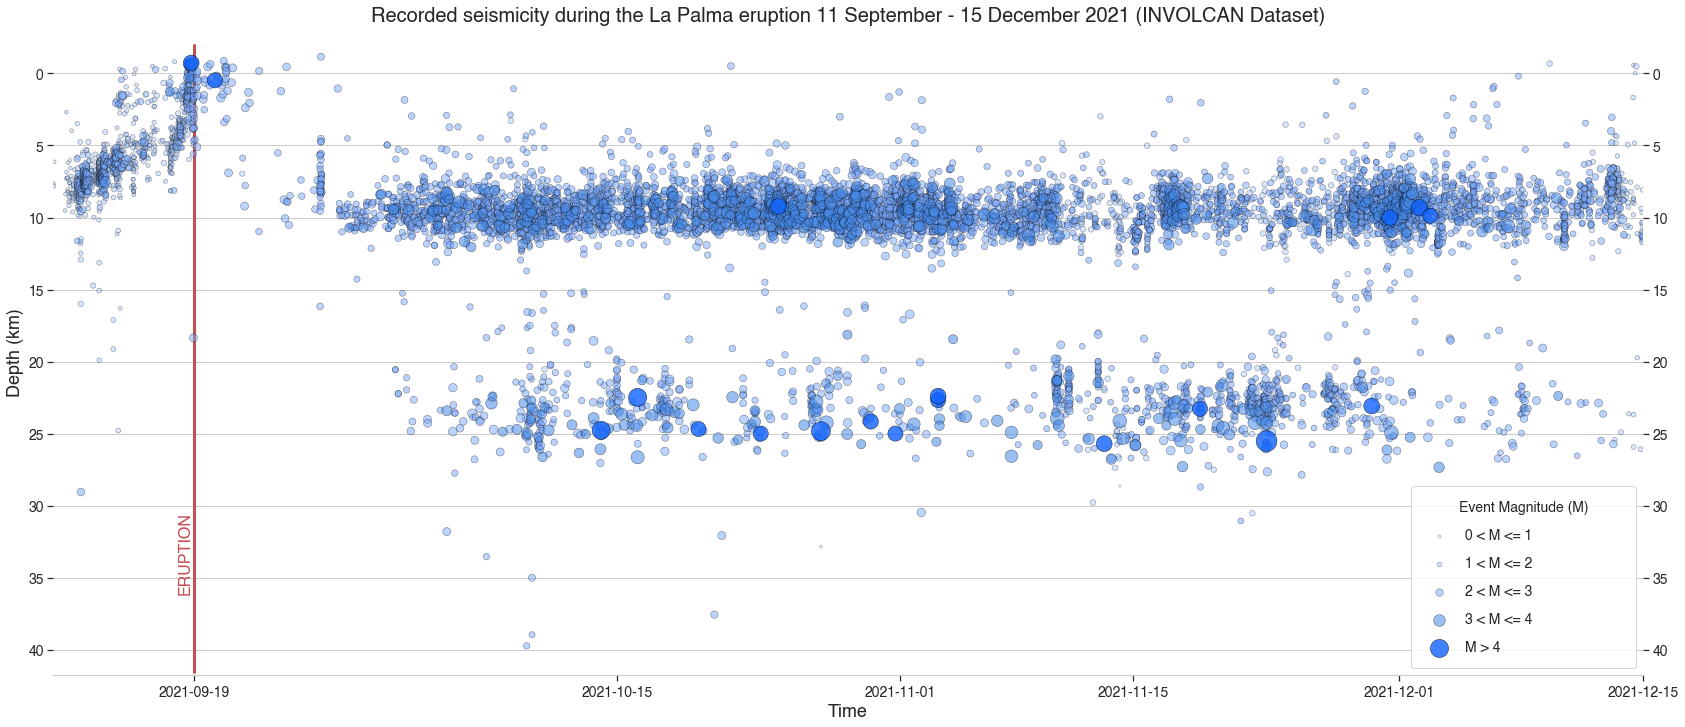

In [14]:
#| label: involcan-timeline-scatter-gray
from matplotlib.patches import Rectangle

import datetime as dt
from matplotlib.dates import date2num, num2date

matplotlib.rcParams['font.sans-serif'] = "Helvetica"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['ytick.labelleft'] = True
matplotlib.rcParams['ytick.labelright'] = True

%matplotlib inline
fig = matplotlib.pyplot.figure(figsize=(24,12))
fig.tight_layout()


ax_timeline = fig.add_axes([0.04, 0.1, 0.92, 0.75])
ax_timeline.spines["top"].set_visible(False)
ax_timeline.spines["right"].set_visible(False)
ax_timeline.spines["left"].set_visible(False)
ax_timeline.grid(axis='x')


ax_timeline.axvline(x=dt.datetime(2021, 9, 19, 14, 13), ymin=0.005, ymax=0.972, color='r', linewidth=3)


def make_scatter(df, c, alpha=0.8):
    M = 3*np.exp2(1.3*df['Magnitude'])
    return ax_timeline.scatter(df['DateTime'], df['Depth(km)'], s=M*1.9, c=c, alpha=alpha, edgecolor='black', linewidth=0.5, zorder=2);


# make_scatter(df_erupt, c=tab20c_colors[-1])
points_1 = make_scatter(df_erupt_1, c=[blues2[1]], alpha=0.4)
points_2 = make_scatter(df_erupt_2, c=[blues2[2]], alpha=0.45)
points_3 = make_scatter(df_erupt_3, c=[blues2[3]], alpha=0.5)
points_4 = make_scatter(df_erupt_4, c=[blues2[4]], alpha=0.55)
points_5 = make_scatter(df_erupt_5, c=[blues2[5]], alpha=0.8)

ax_timeline.tick_params(axis='x', labelrotation=0, bottom=True)
ax_timeline.set_ylabel('')
ax_timeline.yaxis.set_ticks_position('both')
ax_timeline.yaxis.set_ticks_position('both')


xticks = ax_timeline.get_xticks()
new_xticks = [date2num(pd.to_datetime('2021-09-11')),
    date2num(pd.to_datetime('2021-09-19 14:13:00'))]
new_xticks = [*new_xticks, *xticks[2:-1], date2num(pd.to_datetime('2021-12-15 15:50:00'))]
ax_timeline.set_xticks(new_xticks)


ax_timeline.invert_yaxis()
# ax_timeline.spines['bottom'].set_position(('data', 45))
ax_timeline.margins(tight=True, x=0)
ax_timeline.legend(
    [points_1, points_2, points_3, points_4, points_5],
    ['0 < M <= 1','1 < M <= 2','2 < M <= 3','3 < M <= 4','M > 4'],
    loc='lower right', bbox_to_anchor=(0.85, 0.0, 0.15, 0.1), fancybox=True, borderpad=1.0, labelspacing=1, mode="expand", title="Event Magnitude (M)", fontsize=14, title_fontsize=14)

ax_timeline.set_title("Recorded seismicity during the La Palma eruption 11 September - 15 December 2021 (INVOLCAN Dataset)", dict(fontsize=20))
ax_timeline.set_ylabel("Depth (km)", dict(fontsize=18))
ax_timeline.set_xlabel("Time", dict(fontsize=18))

plt.annotate('ERUPTION', (0.078, 0.13), rotation=90, xycoords='axes fraction', fontweight='bold', fontsize=16, color='r')
# ax_timeline.add_patch(Rectangle((date2num(pd.to_datetime('2021-09-11')), -2), date2num(pd.to_datetime('2021-09-19 14:13:00'))-date2num(pd.to_datetime('2021-09-11')), 46, color=tab20_colors[0], zorder=1, alpha=0.05))
# ax_timeline.add_patch(Rectangle((date2num(pd.to_datetime('2021-09-19 14:13:00')), -2), date2num(pd.to_datetime('2021-10-01'))-date2num(pd.to_datetime('2021-09-19 14:13:00')), 46, color=tab20_colors[2], zorder=1, alpha=0.05))
# ax_timeline.add_patch(Rectangle((date2num(pd.to_datetime('2021-10-01')), -2), date2num(pd.to_datetime('2021-12-01'))-date2num(pd.to_datetime('2021-10-01')), 46, color=tab20_colors[4], zorder=1, alpha=0.05))
# ax_timeline.add_patch(Rectangle((date2num(pd.to_datetime('2021-12-01')), -2), date2num(pd.to_datetime('2021-12-16'))-date2num(pd.to_datetime('2021-12-01'))+1, 46, color=tab20_colors[6], zorder=1, alpha=0.05));

# plt.savefig('timeline_with_panels_involcan.eps', format='eps')
# plt.savefig('timeline_with_panels_involcan.png', format='png')

plt.savefig('timeline_no_panels_involcan.png', format='png')
# plt.savefig('timeline_no_panels_involcan.eps', format='eps')


In [53]:
df_intensity = (df.groupby([pd.Grouper(key='DateTime', freq='1D'), 'D'])['Mag']
   .count()
   .reset_index())
df_intensity = df_intensity[df_intensity['DateTime'] >= '2021-09-11']

D, S = list(df_intensity.groupby('D'))
df_shallow = S[1]
df_deep = D[1]


dfd = pd.DataFrame(
    np.insert(df_deep.values, 0, values=[pd.to_datetime('2021-09-11'),'D',0], axis=0),
    columns=['DateTime','D','Mag'])
dfd = dfd.set_index('DateTime', drop=False).resample('1D').asfreq()
dfd[pd.isna(dfd['Mag'])] = 0;

dfs = df_shallow.set_index('DateTime', drop=False).resample('1D').asfreq()
dfs[pd.isna(dfs['Mag'])] = 0;

In [54]:
dfs.head()

DateTime  D  Mag
DateTime                               
2021-09-11  2021-09-11 00:00:00  S   10
2021-09-12  2021-09-12 00:00:00  S  206
2021-09-13  2021-09-13 00:00:00  S  298
2021-09-14  2021-09-14 00:00:00  S  313
2021-09-15  2021-09-15 00:00:00  S  164

In [55]:
dfd.head()

DateTime  D Mag
DateTime                              
2021-09-11  2021-09-11 00:00:00  D   0
2021-09-12  2021-09-12 00:00:00  D   1
2021-09-13  2021-09-13 00:00:00  D   1
2021-09-14  2021-09-14 00:00:00  D   2
2021-09-15  2021-09-15 00:00:00  D   1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


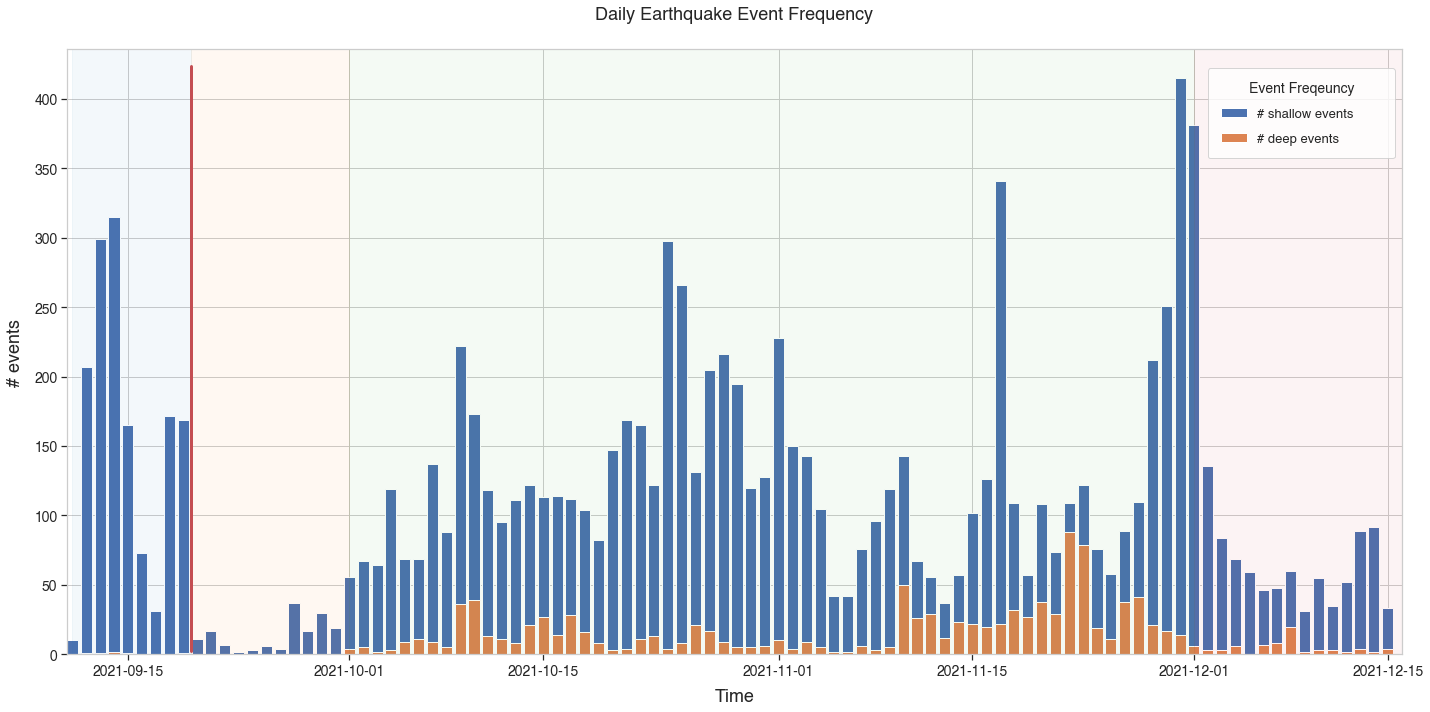

In [120]:
#| label: involcan-histotimeline-bars
from matplotlib.patches import Rectangle

import datetime as dt
from matplotlib.dates import date2num, num2date
from matplotlib.ticker import FuncFormatter

def int_formatter(x, pos):
    return f"{x:.0f}"


%matplotlib inline
fig, ax = matplotlib.pyplot.subplots(1,1,figsize=(20,10))

ax.axvline(x=dt.datetime(2021, 9, 19, 14, 13), ymin=0.005, ymax=0.972, color='r', linewidth=3)

shallow = ax.bar(dfd.index.values, dfs['Mag'], bottom=dfd['Mag'])
deep = ax.bar(dfd.index.values, dfd['Mag'])

ax.tick_params(axis='x', labelrotation=0, bottom=True)
ax.set_ylabel('')
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ax.set_yticklabels(np.abs(ax.get_yticks()))

xticks = ax.get_xticks()
new_xticks = [date2num(pd.to_datetime('2021-09-11')),
    date2num(pd.to_datetime('2021-09-19 14:13:00'))]
new_xticks = np.append(new_xticks, xticks[2:-1])
ax_timeline.set_xticks(new_xticks)

y_formatter = FuncFormatter(int_formatter)
ax.yaxis.set_major_formatter(y_formatter)
ax.yaxis.set_ticks_position('left')

plt.title('Daily Earthquake Event Frequency', fontsize=18, pad=30)
plt.ylabel('# events', fontsize=18, labelpad=10)
ax.set_xlabel("Time", dict(fontsize=18), labelpad=10)
ax.margins(tight=True, x=0)
ax.legend(
    [shallow, deep],
    ['# shallow events','# deep events',],
    loc='best', bbox_to_anchor=(0.85, 0.88, 0.15, 0.1), fancybox=True, borderpad=1.0, labelspacing=1, mode="expand", title="Event Freqeuncy", fontsize=13, title_fontsize=14);

ax.add_patch(Rectangle((date2num(pd.to_datetime('2021-09-11')), -200), date2num(pd.to_datetime('2021-09-19 14:13:00'))-date2num(pd.to_datetime('2021-09-11')), 1050, color=tab20_colors[0], zorder=1, alpha=0.05))
ax.add_patch(Rectangle((date2num(pd.to_datetime('2021-09-19 14:13:00')), -200), date2num(pd.to_datetime('2021-10-01'))-date2num(pd.to_datetime('2021-09-19 14:13:00')), 1050, color=tab20_colors[2], zorder=1, alpha=0.05))
ax.add_patch(Rectangle((date2num(pd.to_datetime('2021-10-01')), -200), date2num(pd.to_datetime('2021-12-01'))-date2num(pd.to_datetime('2021-10-01')), 1050, color=tab20_colors[4], zorder=1, alpha=0.05))
ax.add_patch(Rectangle((date2num(pd.to_datetime('2021-12-01')), -200), date2num(pd.to_datetime('2021-12-15'))-date2num(pd.to_datetime('2021-12-01'))+1, 1050, color=tab20_colors[6], zorder=1, alpha=0.05));
fig.tight_layout()

plt.savefig('histo_intensity_with_panels_involcan.eps', format='eps')
plt.savefig('histo_intensity_with_panels_involcan_bars.png', format='png', dpi=300)

# plt.savefig('histo_intensity_involcan.eps', format='eps')
# plt.savefig('histo_intensity_involcan.png', format='png', dpi=300);


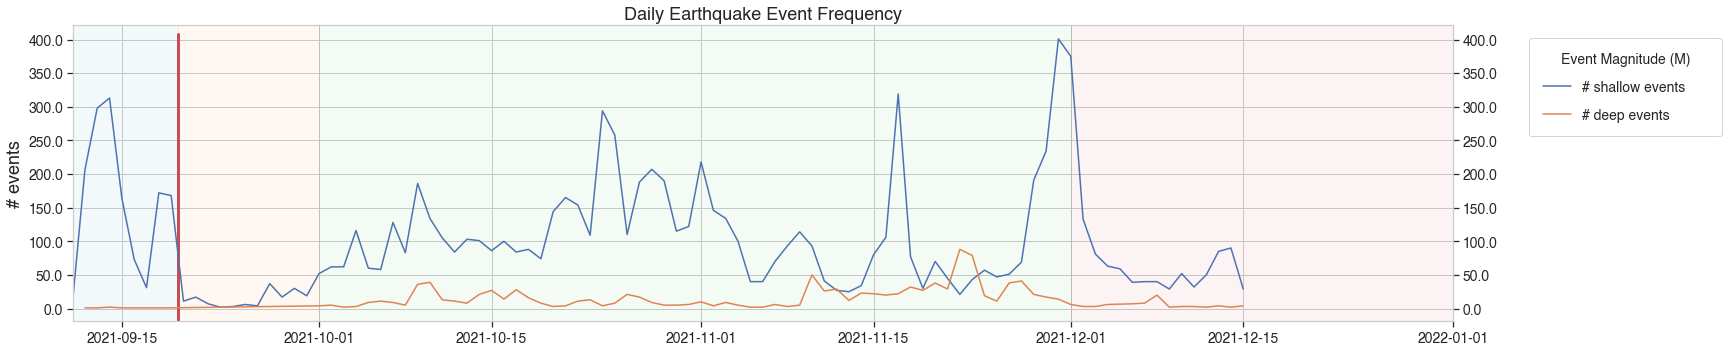

In [59]:
#| label: involcan-histotimeline-lines
from matplotlib.patches import Rectangle

import datetime as dt
from matplotlib.dates import date2num, num2date

%matplotlib inline
fig, ax = matplotlib.pyplot.subplots(1,1,figsize=(24,5))

ax.axvline(x=dt.datetime(2021, 9, 19, 14, 13), ymin=0.005, ymax=0.972, color='r', linewidth=3)


shallow, = ax.plot(df_shallow['DateTime'], df_shallow['Mag'])
deep, = ax.plot(df_deep['DateTime'], df_deep['Mag'])


ax.tick_params(axis='x', labelrotation=0, bottom=True)
ax.set_ylabel('')
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ax.set_yticklabels(np.abs(ax.get_yticks()))

xticks = ax.get_xticks()
new_xticks = [date2num(pd.to_datetime('2021-09-11')),
    date2num(pd.to_datetime('2021-09-19 14:13:00'))]
new_xticks = np.append(new_xticks, xticks[2:-1])
ax_timeline.set_xticks(new_xticks)

plt.title('Daily Earthquake Event Frequency', fontsize=18)
plt.ylabel('# events', fontsize=18)
ax.margins(tight=True, x=0)
ax.legend(
    [shallow, deep],
    ['# shallow events','# deep events',],
    loc='best', bbox_to_anchor=(1.05, 0.88, 0.15, 0.1), fancybox=True, borderpad=1.0, labelspacing=1, mode="expand", title="Event Magnitude (M)", fontsize=14, title_fontsize=14)

ax.add_patch(Rectangle((date2num(pd.to_datetime('2021-09-11')), -200), date2num(pd.to_datetime('2021-09-19 14:13:00'))-date2num(pd.to_datetime('2021-09-11')), 1050, color=tab20_colors[0], zorder=1, alpha=0.05))
ax.add_patch(Rectangle((date2num(pd.to_datetime('2021-09-19 14:13:00')), -200), date2num(pd.to_datetime('2021-10-01'))-date2num(pd.to_datetime('2021-09-19 14:13:00')), 1050, color=tab20_colors[2], zorder=1, alpha=0.05))
ax.add_patch(Rectangle((date2num(pd.to_datetime('2021-10-01')), -200), date2num(pd.to_datetime('2021-12-01'))-date2num(pd.to_datetime('2021-10-01')), 1050, color=tab20_colors[4], zorder=1, alpha=0.05))
ax.add_patch(Rectangle((date2num(pd.to_datetime('2021-12-01')), -200), date2num(pd.to_datetime('2021-12-31'))-date2num(pd.to_datetime('2021-12-01'))+1, 1050, color=tab20_colors[6], zorder=1, alpha=0.05));
fig.tight_layout()

# plt.savefig('histotimeline_grey_with_panels_involcan.eps', format='eps')
plt.savefig('histotimeline_grey_with_panels_involcan_lines.png', format='png')


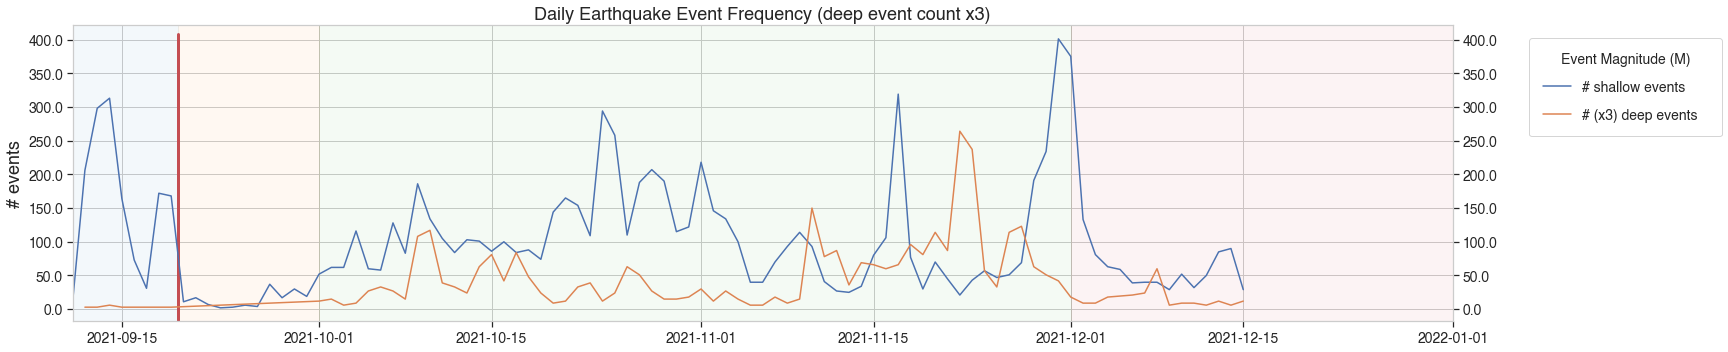

In [42]:
#| label: involcan-histotimeline-lines-exagerated
from matplotlib.patches import Rectangle

import datetime as dt
from matplotlib.dates import date2num, num2date

%matplotlib inline
fig, ax = matplotlib.pyplot.subplots(1,1,figsize=(24,5))

ax.axvline(x=dt.datetime(2021, 9, 19, 14, 13), ymin=0.005, ymax=0.972, color='r', linewidth=3)


shallow, = ax.plot(df_shallow['DateTime'], df_shallow['Mag'])
deep, = ax.plot(df_deep['DateTime'], 3*df_deep['Mag'])


ax.tick_params(axis='x', labelrotation=0, bottom=True)
ax.set_ylabel('')
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ax.set_yticklabels(np.abs(ax.get_yticks()))

xticks = ax.get_xticks()
new_xticks = [date2num(pd.to_datetime('2021-09-11')),
    date2num(pd.to_datetime('2021-09-19 14:13:00'))]
new_xticks = np.append(new_xticks, xticks[2:-1])
ax_timeline.set_xticks(new_xticks)

plt.title('Daily Earthquake Event Frequency (deep event count x3)', fontsize=18)
plt.ylabel('# events', fontsize=18)
ax.margins(tight=True, x=0)
ax.legend(
    [shallow, deep],
    ['# shallow events','# (x3) deep events',],
    loc='best', bbox_to_anchor=(1.05, 0.88, 0.15, 0.1), fancybox=True, borderpad=1.0, labelspacing=1, mode="expand", title="Event Magnitude (M)", fontsize=14, title_fontsize=14)

ax.add_patch(Rectangle((date2num(pd.to_datetime('2021-09-11')), -200), date2num(pd.to_datetime('2021-09-19 14:13:00'))-date2num(pd.to_datetime('2021-09-11')), 1050, color=tab20_colors[0], zorder=1, alpha=0.05))
ax.add_patch(Rectangle((date2num(pd.to_datetime('2021-09-19 14:13:00')), -200), date2num(pd.to_datetime('2021-10-01'))-date2num(pd.to_datetime('2021-09-19 14:13:00')), 1050, color=tab20_colors[2], zorder=1, alpha=0.05))
ax.add_patch(Rectangle((date2num(pd.to_datetime('2021-10-01')), -200), date2num(pd.to_datetime('2021-12-01'))-date2num(pd.to_datetime('2021-10-01')), 1050, color=tab20_colors[4], zorder=1, alpha=0.05))
ax.add_patch(Rectangle((date2num(pd.to_datetime('2021-12-01')), -200), date2num(pd.to_datetime('2021-12-31'))-date2num(pd.to_datetime('2021-12-01'))+1, 1050, color=tab20_colors[6], zorder=1, alpha=0.05));
fig.tight_layout()

# plt.savefig('histotimeline_grey_with_panels_involcan.eps', format='eps')
plt.savefig('histotimeline_grey_with_panels_involcan_lines_3x.png', format='png')


In [50]:
from scipy.stats import pearsonr

df_intensity = (df.groupby([pd.Grouper(key='DateTime', freq='12H'), 'D'])['Mag']
   .count()
   .reset_index())
df_intensity = df_intensity[df_intensity['DateTime'] >= '2021-09-11']

D, S = list(df_intensity.groupby('D'))
df_shallow = S[1]
df_deep = D[1]

dfd = pd.DataFrame(
    np.insert(df_deep.values, 0, values=[pd.to_datetime('2021-09-11'),'D',0], axis=0),
    columns=['DateTime','D','Mag'])
dfd = dfd.set_index('DateTime').resample('12H').asfreq()
dfd[pd.isna(dfd['Mag'])] = 0;

dfs = df_shallow.set_index('DateTime').resample('12H').asfreq()
dfs[pd.isna(dfs['Mag'])] = 0;


print(len(dfs.index),len(dfd.index))

pearsonr(dfs['Mag'], dfd['Mag'])

192 192


(-0.034626455582294435, 0.6334987159966295)

7.5

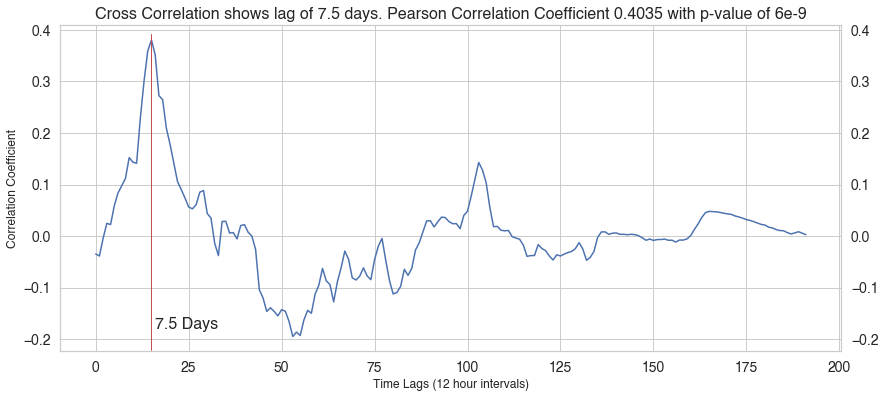

In [51]:
import statsmodels.api as sm

xcorr = sm.tsa.stattools.ccf(dfs['Mag'], dfd['Mag'], adjusted=False)

# Remove padding and reverse the order
plt.figure(figsize=(14,6))
plt.plot(xcorr[0:(len(dfs['Mag'].index)+1)]);
plt.title('Cross Correlation shows lag of 7.5 days. Pearson Correlation Coefficient 0.4035 with p-value of 6e-9', size='16')
plt.axvline(x=15, ymin=0.005, ymax=0.972, color='r', linewidth=1)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Time Lags (12 hour intervals)')
plt.text(16, -0.18, '7.5 Days', size=16)

plt.savefig('xcorr_plot.eps', format='eps')
plt.savefig('xcorr_plot.png', format='png')

np.argmax(xcorr)
np.argmax(xcorr)*12/24

In [ ]:
#| label: involcan-timeline-scatter-color
from matplotlib.patches import Rectangle

import datetime as dt
from matplotlib.dates import date2num, num2date

matplotlib.rcParams['font.sans-serif'] = "Helvetica"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['ytick.labelleft'] = True
matplotlib.rcParams['ytick.labelright'] = True

%matplotlib inline
fig = matplotlib.pyplot.figure(figsize=(24,12))
fig.tight_layout()
# Creating axis
# add_axes([xmin,ymin,dx,dy])
ax_min = fig.add_axes([0.01, 0.01, 0.01, 0.01])
ax_min.axis('off')
ax_max = fig.add_axes([0.99, 0.99, 0.01, 0.01])
ax_max.axis('off')

ax_timeline = fig.add_axes([0.04, 0.1, 0.92, 0.85])
ax_timeline.spines["top"].set_visible(False)
ax_timeline.spines["right"].set_visible(False)
ax_timeline.spines["left"].set_visible(False)
ax_timeline.grid(axis='x')


ax_timeline.axvline(x=dt.datetime(2021, 9, 19, 14, 13), ymin=0.005, ymax=0.972, color='r', linewidth=3)


def make_scatter(df, c, alpha=0.8):
    M = 3*np.exp2(1.3*df['Magnitude'])
    return ax_timeline.scatter(df['DateTime'], df['Depth(km)'], s=M, c=c, alpha=alpha, edgecolor='black', linewidth=0.5, zorder=2);

# make_scatter(df_erupt, c=tab20c_colors[-1])
points_1 = make_scatter(df_erupt_1, c=[tab20_colors[12]], alpha=0.3)
points_2 = make_scatter(df_erupt_2, c=[tab20_colors[16]], alpha=0.4)
points_3 = make_scatter(df_erupt_3, c=[tab20_colors[4]], alpha=0.5)
points_4 = make_scatter(df_erupt_4, c=[tab20_colors[2]], alpha=0.6)
points_5 = make_scatter(df_erupt_5, c=[tab20_colors[6]], alpha=0.8)

ax_timeline.tick_params(axis='x', labelrotation=0, bottom=True)
ax_timeline.set_ylabel('')
ax_timeline.yaxis.set_ticks_position('both')
ax_timeline.yaxis.set_ticks_position('both')


xticks = ax_timeline.get_xticks()
new_xticks = [date2num(pd.to_datetime('2021-09-11')),
    date2num(pd.to_datetime('2021-09-19 14:13:00'))]
new_xticks = np.append(new_xticks, xticks[2:-1])
ax_timeline.set_xticks(new_xticks)


ax_timeline.invert_yaxis()
ax_timeline.spines['bottom'].set_position(('data', 45))
ax_timeline.margins(tight=True, x=0)
ax_timeline.legend(
    [points_1, points_2, points_3, points_4, points_5],
    ['0 < M <= 1','1 < M <= 2','2 < M <= 3','3 < M <= 4','M > 4'],
    loc='best', bbox_to_anchor=(1.02, 0.88, 0.15, 0.1), fancybox=True, borderpad=1.0, labelspacing=1, mode="expand", title="Event Magnitude (M)", fontsize=14, title_fontsize=14)


plt.savefig('timeline_colors_involcan.eps', format='eps')

In [ ]:
from matplotlib.patches import Rectangle

import datetime as dt
from matplotlib.dates import date2num, num2date

matplotlib.rcParams['font.sans-serif'] = "Helvetica"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['ytick.labelleft'] = True
matplotlib.rcParams['ytick.labelright'] = True

%matplotlib inline
fig = matplotlib.pyplot.figure(figsize=(24,12))
fig.tight_layout()
# Creating axis
# add_axes([xmin,ymin,dx,dy])
ax_min = fig.add_axes([0.01, 0.01, 0.01, 0.01])
ax_min.axis('off')
ax_max = fig.add_axes([0.99, 0.99, 0.01, 0.01])
ax_max.axis('off')

ax_timeline = fig.add_axes([0.04, 0.1, 0.92, 0.85])
ax_timeline.spines["top"].set_visible(False)
ax_timeline.spines["right"].set_visible(False)
ax_timeline.spines["left"].set_visible(False)
ax_timeline.grid(axis='x')


ax_timeline.axvline(x=dt.datetime(2021, 9, 19, 14, 13), ymin=0.005, ymax=0.972, color='r', linewidth=3)


def make_scatter(df, c, alpha=0.8):
    M = 3*np.exp2(1.3*df['Magnitude'])
    return ax_timeline.scatter(df['DateTime'], df['Depth(km)'], s=M, c=c, alpha=alpha, edgecolor='black', linewidth=0.5, zorder=2);

# make_scatter(df_erupt, c=tab20c_colors[-1])
points_1 = make_scatter(df_erupt_1, c=[tab20_colors[12]], alpha=0.3)
points_2 = make_scatter(df_erupt_2, c=[tab20_colors[16]], alpha=0.4)
points_3 = make_scatter(df_erupt_3, c=[tab20_colors[4]], alpha=0.5)
points_4 = make_scatter(df_erupt_4, c=[tab20_colors[2]], alpha=0.6)
points_5 = make_scatter(df_erupt_5, c=[tab20_colors[6]], alpha=0.8)

ax_timeline.tick_params(axis='x', labelrotation=0, bottom=True)
ax_timeline.set_ylabel('')
ax_timeline.yaxis.set_ticks_position('both')
ax_timeline.yaxis.set_ticks_position('both')


xticks = ax_timeline.get_xticks()
new_xticks = [date2num(pd.to_datetime('2021-09-11')),
    date2num(pd.to_datetime('2021-09-19 14:13:00'))]
new_xticks = np.append(new_xticks, xticks[2:-1])
ax_timeline.set_xticks(new_xticks)


ax_timeline.invert_yaxis()
ax_timeline.spines['bottom'].set_position(('data', 45))
ax_timeline.margins(tight=True, x=0)
ax_timeline.legend(
    [points_1, points_2, points_3, points_4, points_5],
    ['0 < M <= 1','1 < M <= 2','2 < M <= 3','3 < M <= 4','M > 4'],
    loc='best', bbox_to_anchor=(1.02, 0.88, 0.15, 0.1), fancybox=True, borderpad=1.0, labelspacing=1, mode="expand", title="Event Magnitude (M)", fontsize=14, title_fontsize=14)


ax_timeline.add_patch(Rectangle((date2num(pd.to_datetime('2021-09-11')), -1), date2num(pd.to_datetime('2021-09-19 14:13:00'))-date2num(pd.to_datetime('2021-09-11')), 46, color=tab20_colors[0], zorder=1, alpha=0.1))
ax_timeline.add_patch(Rectangle((date2num(pd.to_datetime('2021-09-19 14:13:00')), -1), date2num(pd.to_datetime('2021-10-01'))-date2num(pd.to_datetime('2021-09-19 14:13:00')), 46, color=tab20_colors[2], zorder=1, alpha=0.1))
ax_timeline.add_patch(Rectangle((date2num(pd.to_datetime('2021-10-01')), -1), date2num(pd.to_datetime('2021-12-01'))-date2num(pd.to_datetime('2021-10-01')), 46, color=tab20_colors[4], zorder=1, alpha=0.1))
ax_timeline.add_patch(Rectangle((date2num(pd.to_datetime('2021-12-01')), -1), date2num(pd.to_datetime('2021-12-31'))-date2num(pd.to_datetime('2021-12-01'))+1, 46, color=tab20_colors[6], zorder=1, alpha=0.1));


plt.savefig('timeline_colors_no_panels_involcan.eps', format='eps')

## Cumulative Distrubtion Plots

In [70]:
def cumulative_events_mag_depth(df, hue='Depth', kind='scatter', ax=None, dpi=300, palette=None, kde=True):
    matplotlib.rcParams['ytick.labelright'] = False
    g = sns.jointplot(x="Magnitude", y="Depth(km)", data=df,
                      kind=kind, hue=hue, height=10, space=0.1, marginal_ticks=False, ratio=8, alpha=0.6,
                      hue_order=['Shallow (<18km)', 'Interchange (18km>x>28km)', 'Deep (>28km)'],
                      ax=ax, palette=palette, ylim=(-2,50), xlim=(0.3,5.6), edgecolor=".2", marginal_kws=dict(bins=20, hist_kws={'edgecolor': 'black'}))
    if kde:
        g.plot_joint(sns.kdeplot, color="b", zorder=1, levels=15, ax=ax)
    g.fig.axes[0].invert_yaxis();
    g.fig.set_dpi(dpi)

    
def cumulative_events_spatial(df, hue='Depth', kind='scatter', ax=None, dpi=300, palette=None):
    g = sns.jointplot(x="Longitude", y="Depth(km)", data=df,
                      kind=kind, hue=hue, color="m", height=10, palette=palette,
                      hue_order=['Shallow (<18km)', 'Interchange (18km>x>28km)',  'Deep (>28km)', ], ax=ax, ylim=(-2,50))
    g.plot_joint(sns.kdeplot, color="b", zorder=1, levels=15, ax=ax)
    g.fig.axes[0].invert_yaxis();

/opt/homebrew/Caskroom/miniforge/base/envs/lapalma-earthquakes/lib/python3.10/site-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


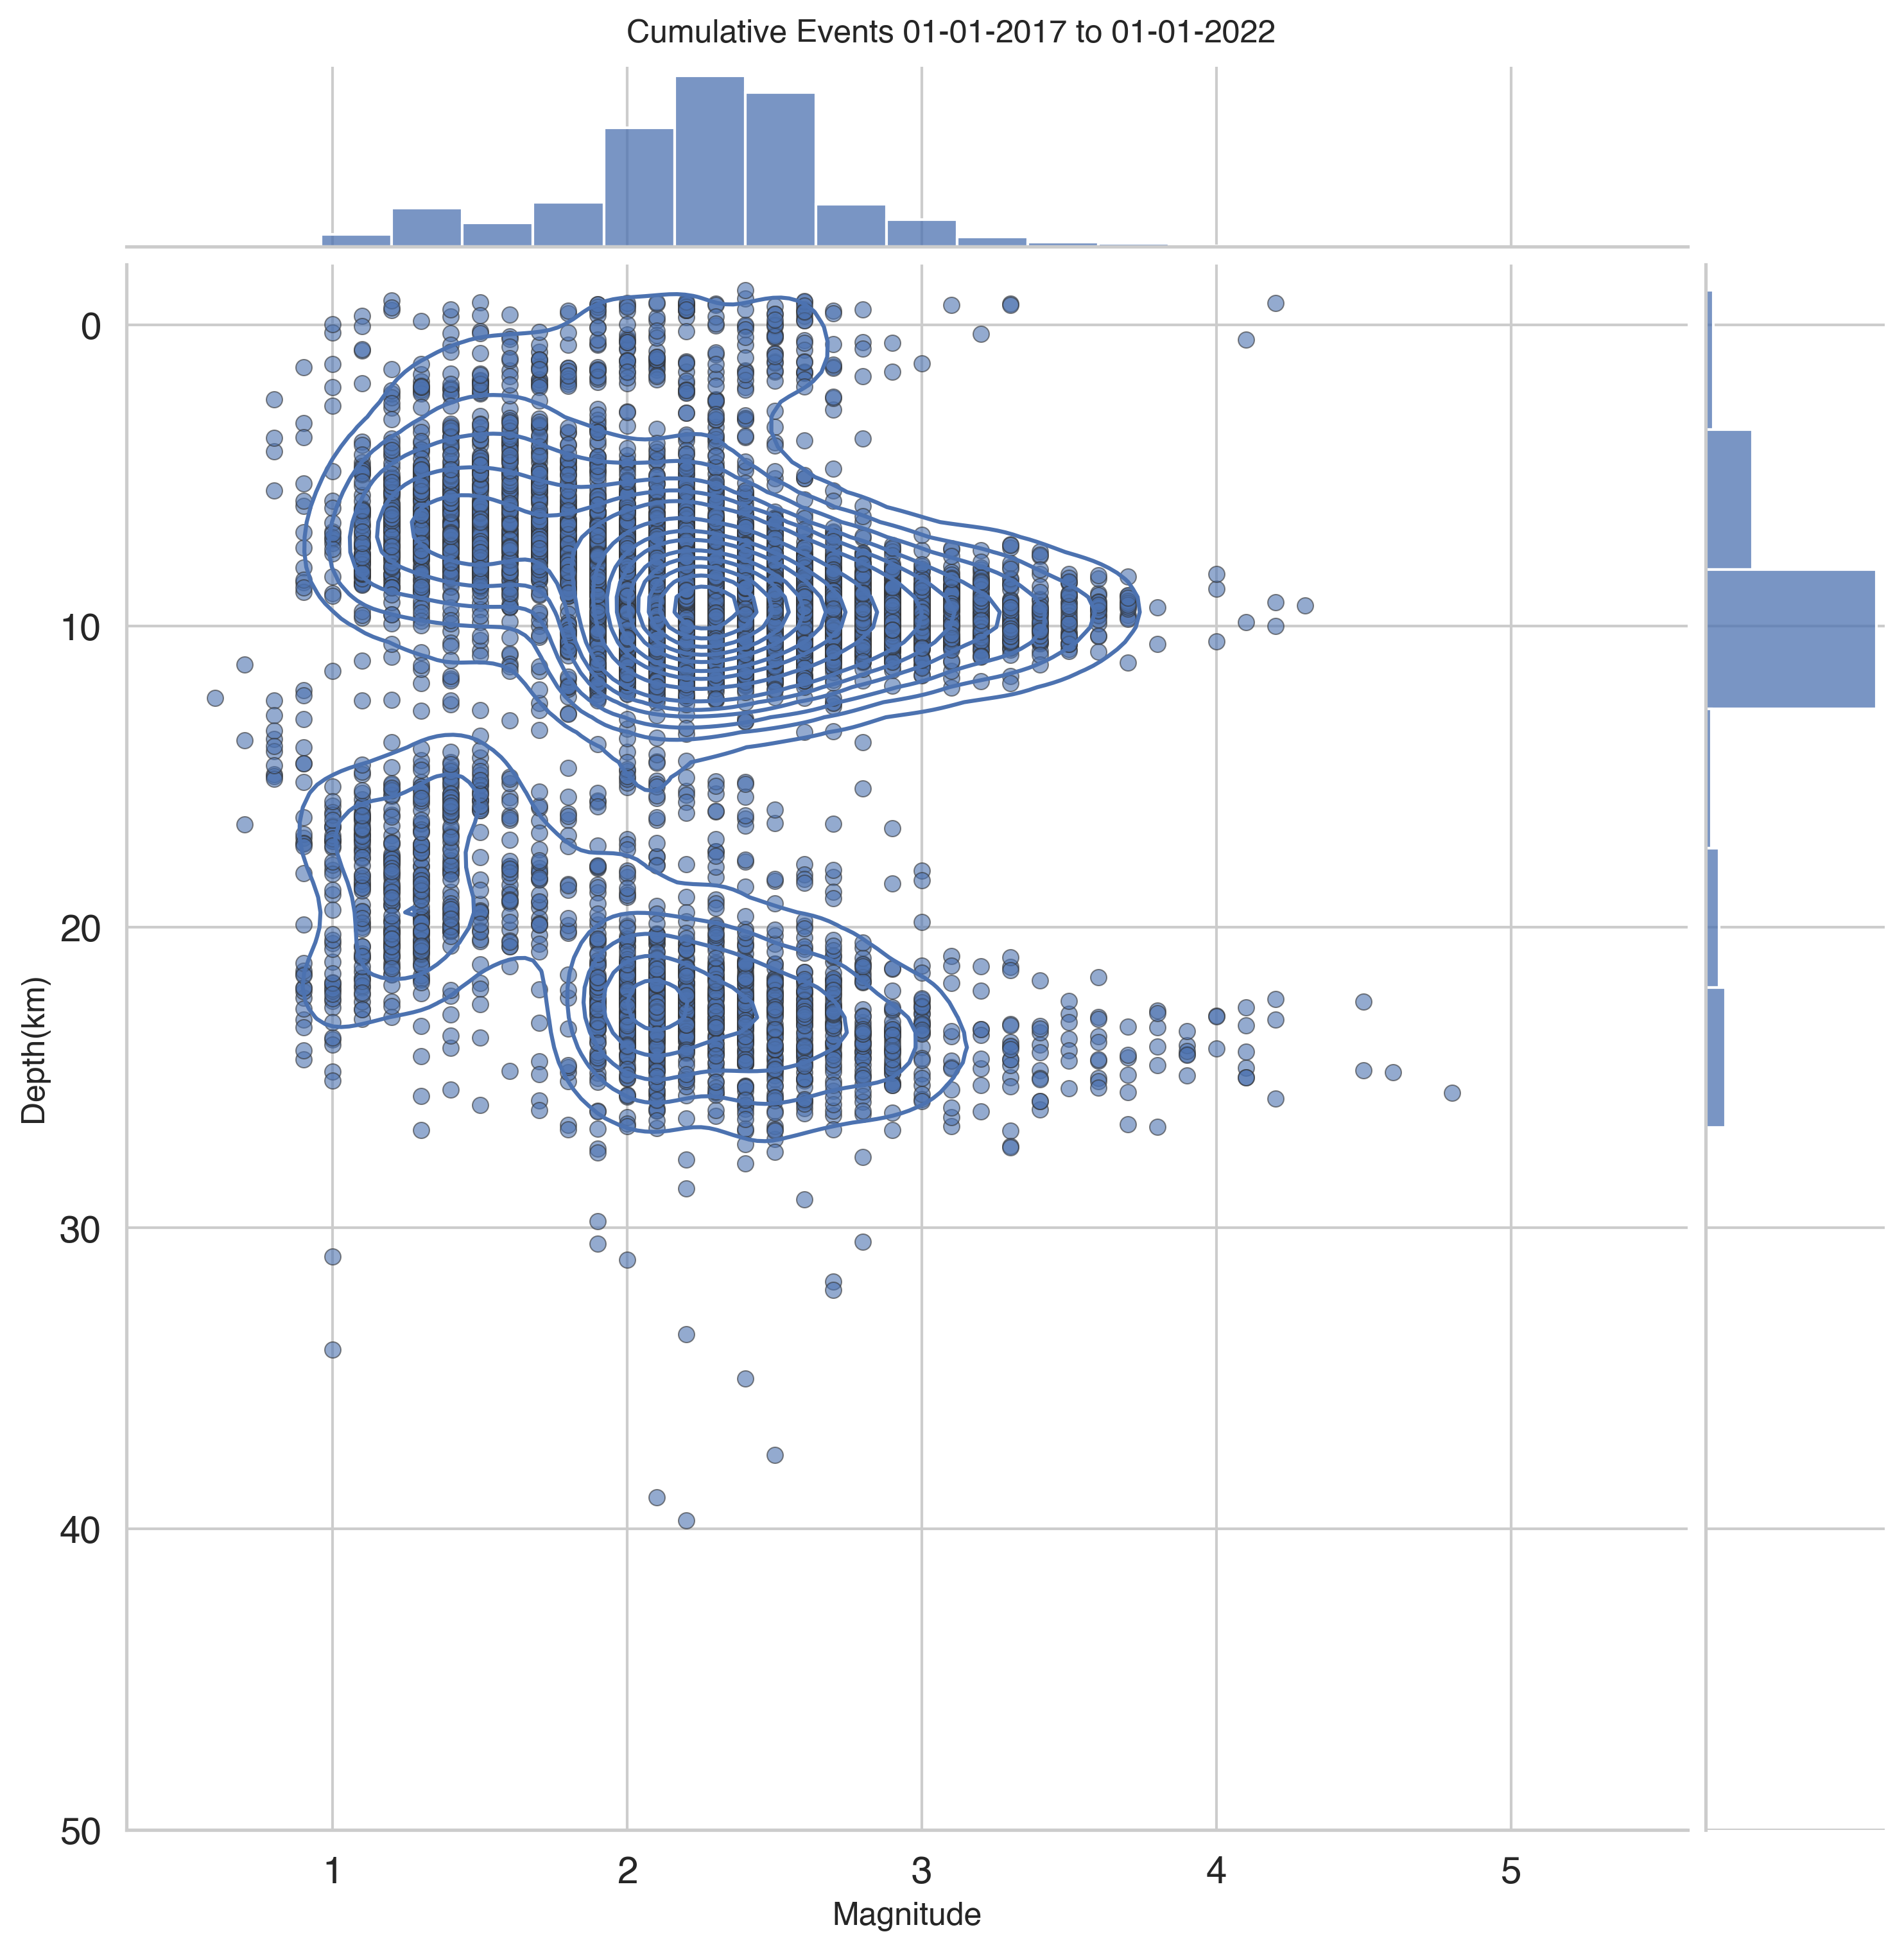

In [71]:
cumulative_events_mag_depth(df, hue=None)
plt.suptitle('Cumulative Events 01-01-2017 to 01-01-2022', y=1.01);
plt.savefig('cuml_events_all_involcan.eps', format='eps')

/opt/homebrew/Caskroom/miniforge/base/envs/lapalma-earthquakes/lib/python3.10/site-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


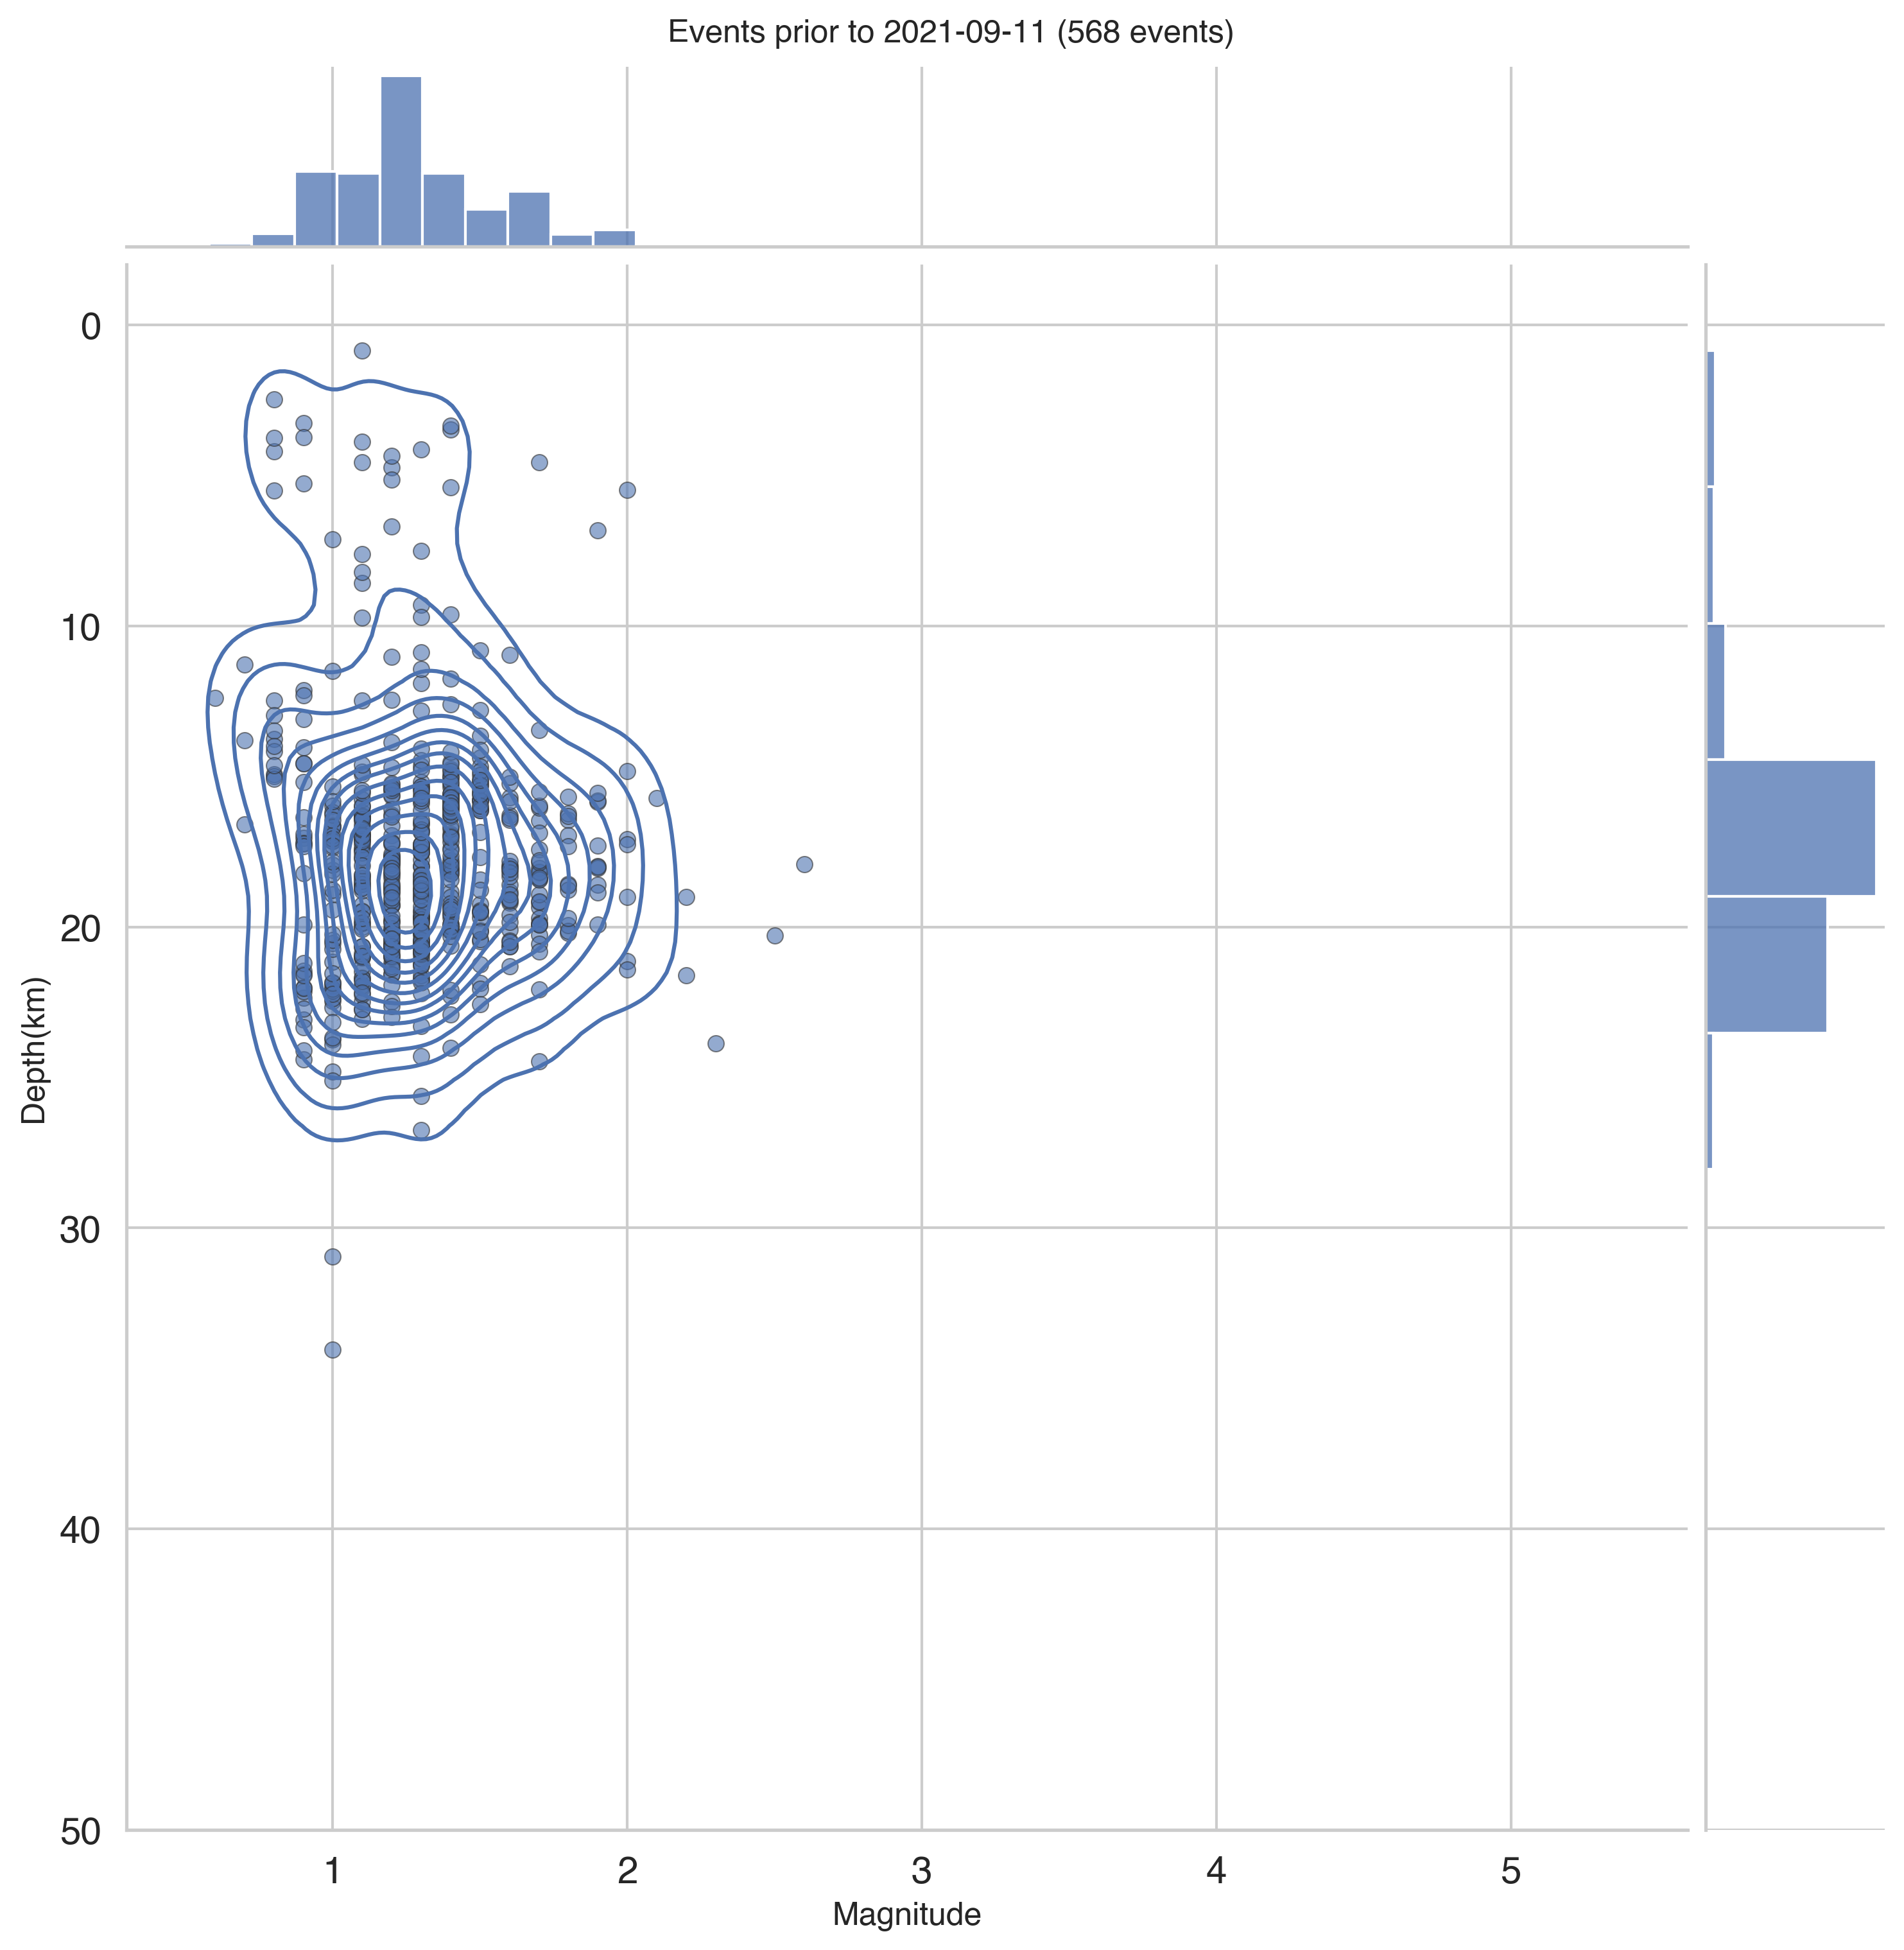

In [72]:
cumulative_events_mag_depth(df_early, hue=None)
plt.suptitle(f'Events prior to 2021-09-11 ({len(df_early.index)} events)', y=1.01)
plt.savefig('cuml_events_early_involcan.eps', format='eps')

/opt/homebrew/Caskroom/miniforge/base/envs/lapalma-earthquakes/lib/python3.10/site-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


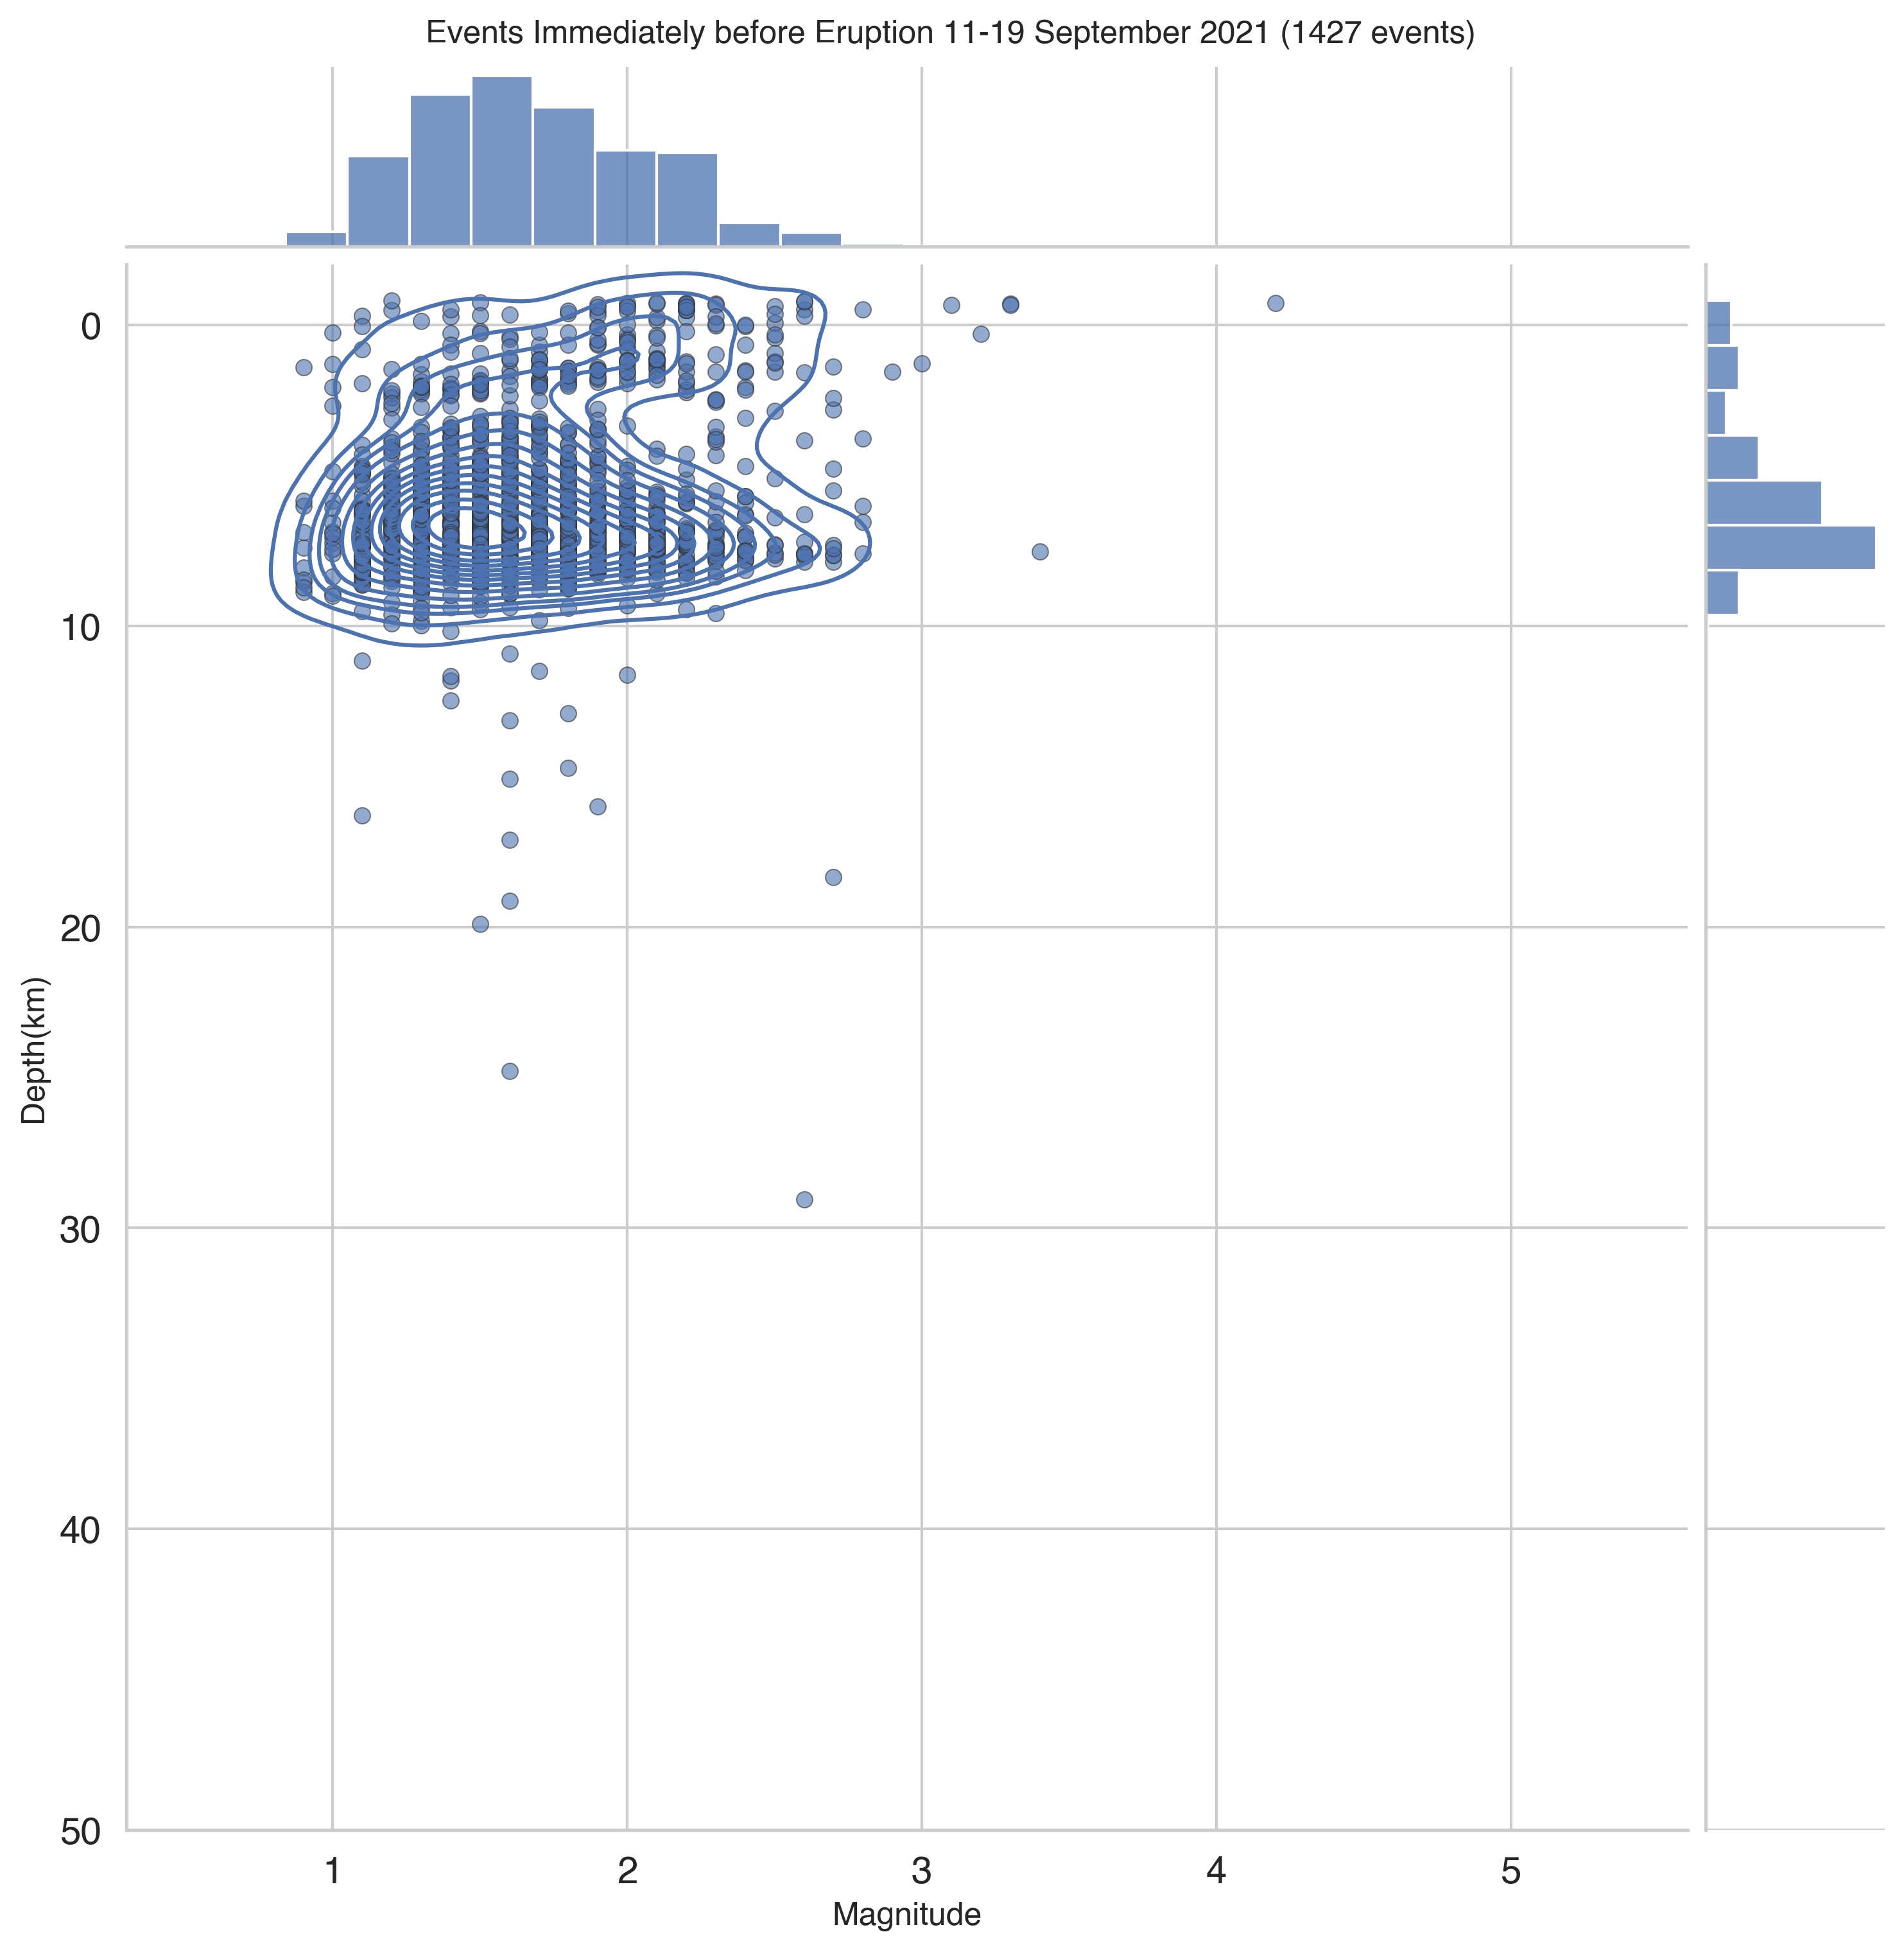

In [73]:
cumulative_events_mag_depth(df_pre, hue=None)
plt.suptitle(f"Events Immediately before Eruption 11-19 September 2021 ({len(df_pre.index)} events)", y=1.01);
plt.savefig('cuml_events_preerupt_involcan.eps', format='eps')

/opt/homebrew/Caskroom/miniforge/base/envs/lapalma-earthquakes/lib/python3.10/site-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


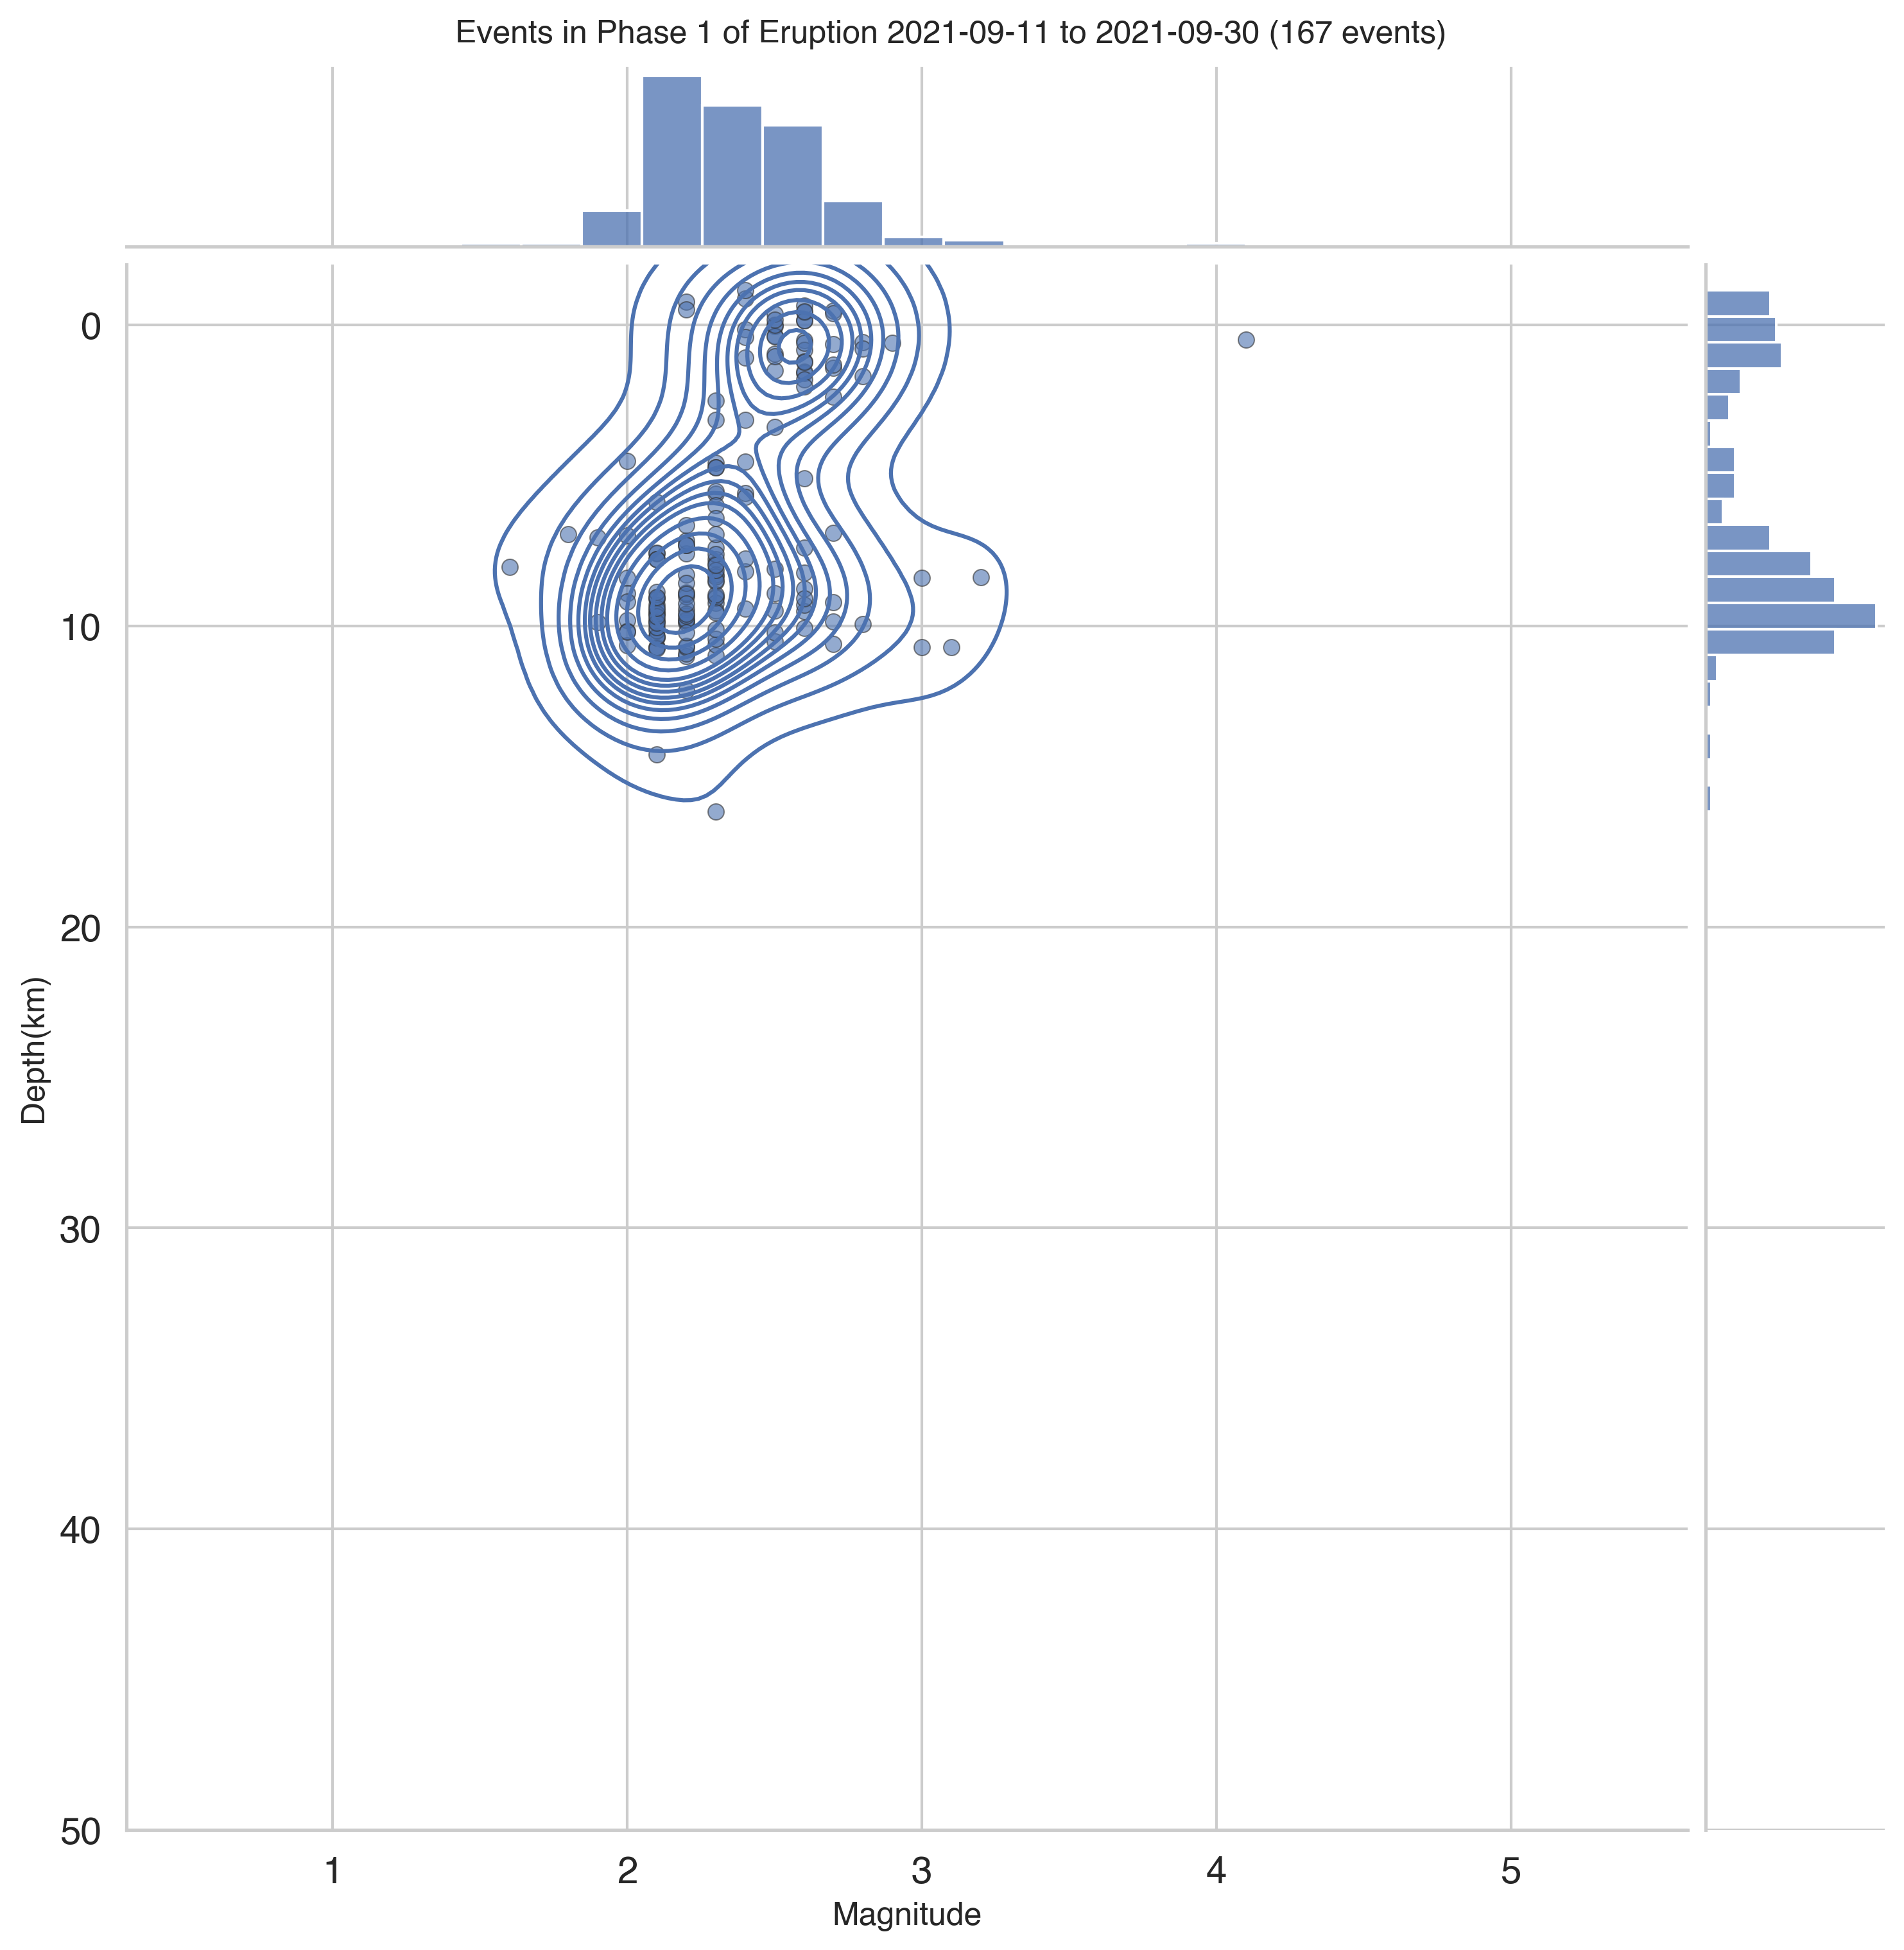

In [74]:
cumulative_events_mag_depth(df_phase1, hue=None)
plt.suptitle(f"Events in Phase 1 of Eruption 2021-09-11 to 2021-09-30 ({len(df_phase1.index)} events)", y=1.01);
plt.savefig('cuml_events_phase1_involcan.eps', format='eps')

/opt/homebrew/Caskroom/miniforge/base/envs/lapalma-earthquakes/lib/python3.10/site-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


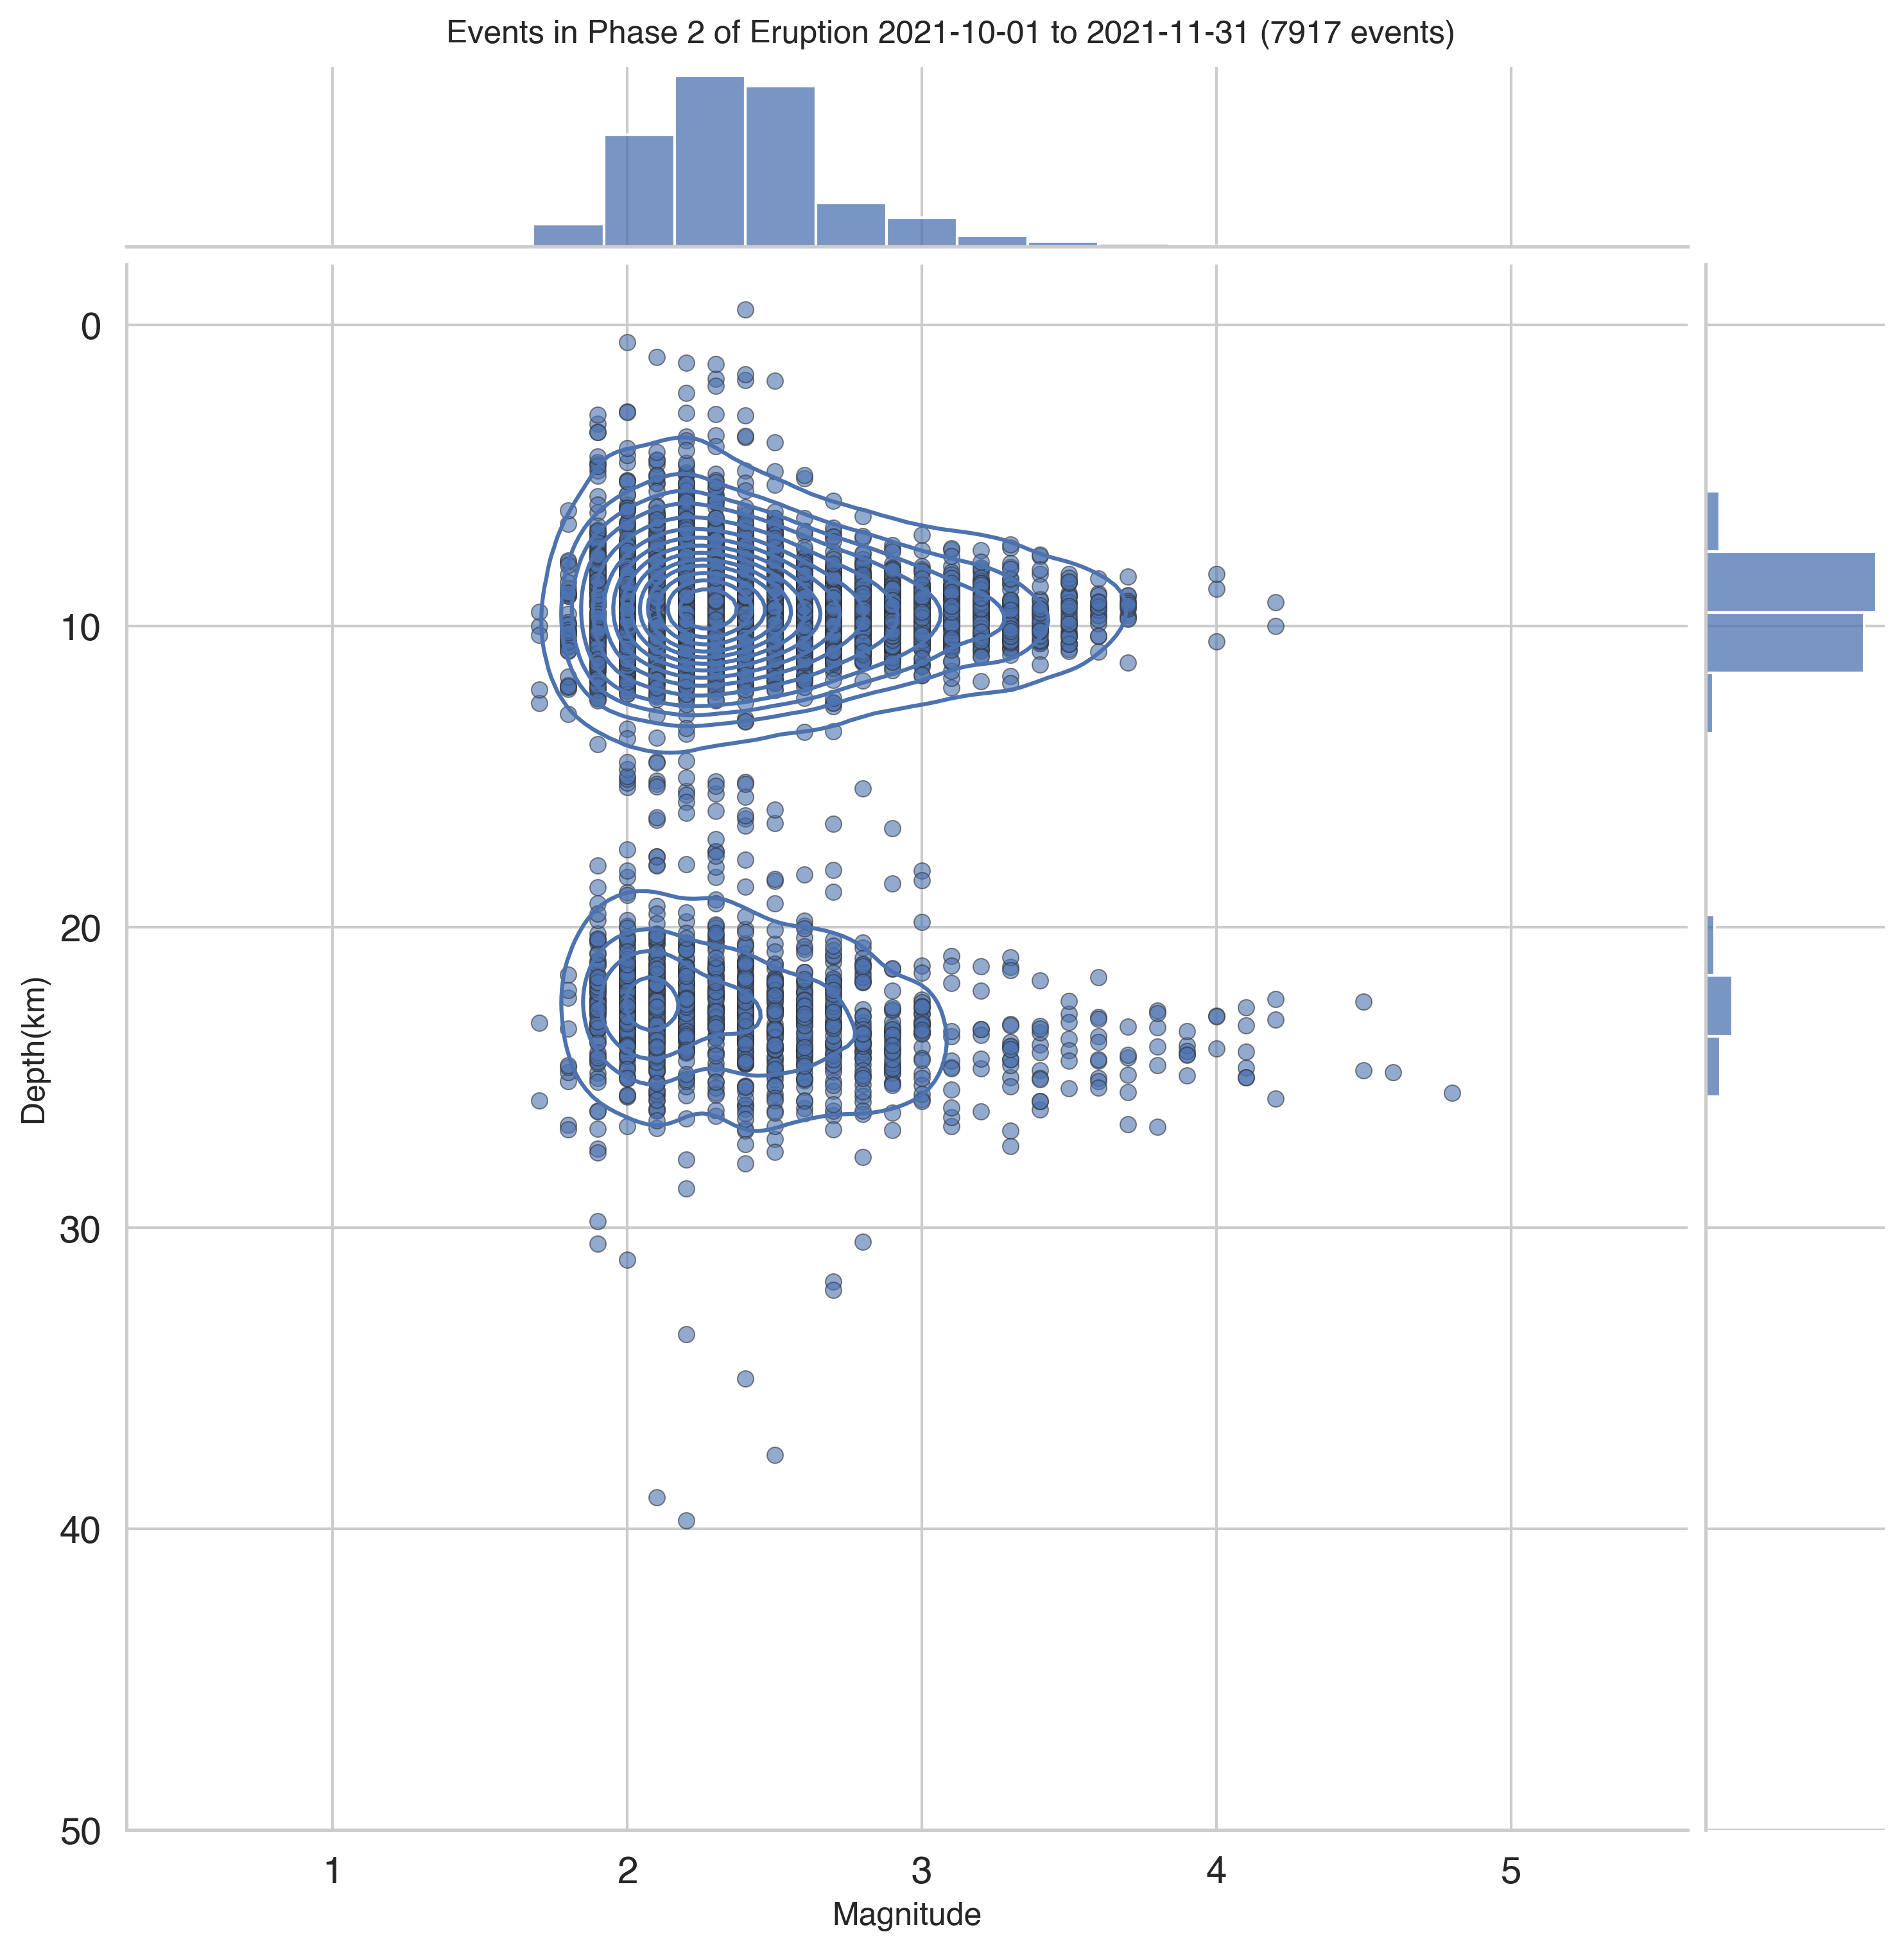

In [75]:
cumulative_events_mag_depth(df_phase2, hue=None)
plt.suptitle(f"Events in Phase 2 of Eruption 2021-10-01 to 2021-11-31 ({len(df_phase2.index)} events)", y=1.01);
plt.savefig('cuml_events_phase2_involcan.eps', format='eps')

/opt/homebrew/Caskroom/miniforge/base/envs/lapalma-earthquakes/lib/python3.10/site-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


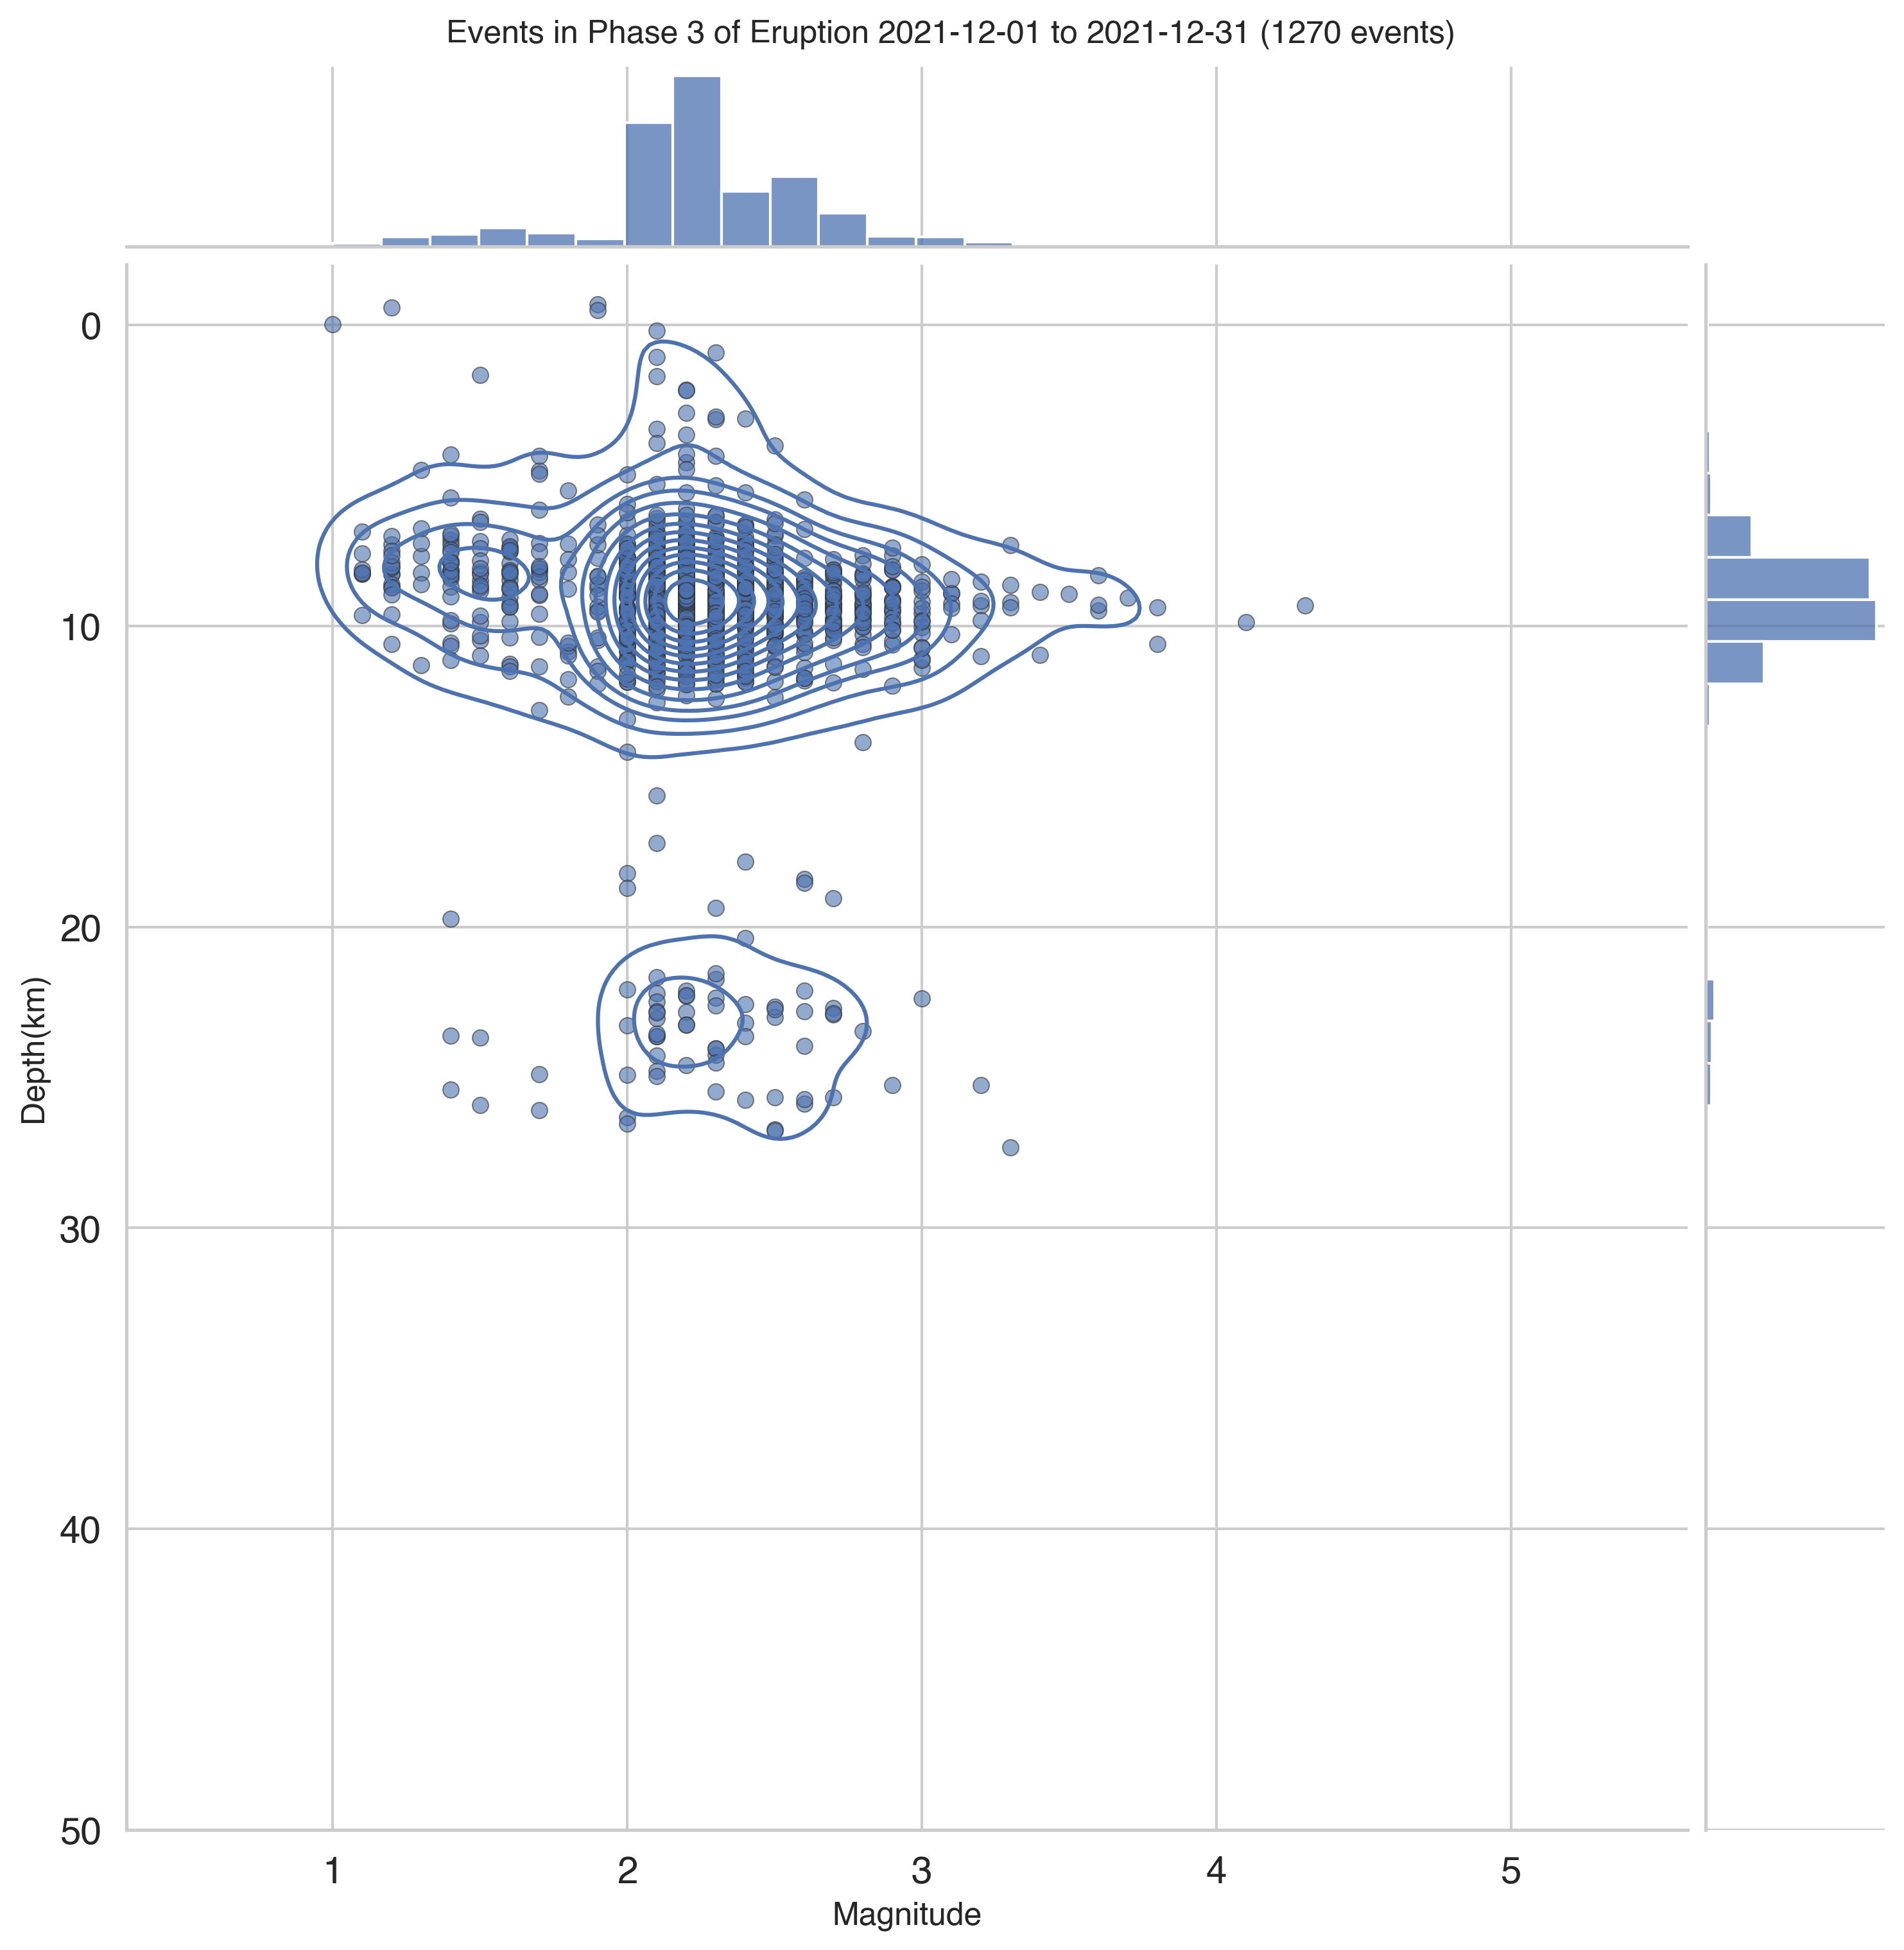

In [76]:
cumulative_events_mag_depth(df_phase3, hue=None)
plt.suptitle(f"Events in Phase 3 of Eruption 2021-12-01 to 2021-12-31 ({len(df_phase3.index)} events)", y=1.01);
plt.savefig('cuml_events_phase3_involcan.eps', format='eps')